## Predicting Customer Churn in Gyms

<span style="color:blue"> **Project description:** </span> The gym chain Model Fitness is developing a customer interaction strategy based on analytical data. One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.

Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your follower might have gotten bored and left you.

For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.

In order to fight churn, Model Fitness has digitized a number of its customer profiles. Our task is to analyze them and come up with a customer retention strategy.

### Table of Contents

* [Step 1](#step1) Preliminary analysis of dataset
    * [Step 1.1](#step1_1) General information and basic pre-processing 
    * [Step 1.2](#step1_2) Project goals
* [Step 2](#step2) Exploratory data analysis (EDA)
    * [Step 2.1](#step2_1) Summary statistics and bar histograms of features
    * [Step 2.2](#step2_2) Summary statistics and bar histograms of features grouped by churn property
    * [Step 2.3](#step2_3) Linear dependency analysis via the correlation matrix
* [Step 3](#step3) Building a model to predict churn
* [Step 4](#step4) Creating user clusters
* [Step 5](#step5) General conclusions and recommendations

<span style="color:blue">**Importing libraries:**</span> First, we import all code libraries and define output style functions we will be using in our project.

In [1]:
# Import libraries and define output style functions.

# Import the pandas library 
#      (url-> https://pandas.pydata.org/).
import pandas as pd

# Import the datetime library 
#      (https://docs.python.org/3/library/datetime.html).
import datetime as dt

# Import pyplot module from matplotlib 
#      (url-> https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html).
import matplotlib.pyplot as plt

# Import seaborn library
#      (https://seaborn.pydata.org/).
import seaborn as sns

# Import the numpy library 
#      (url-> https://pandas.pydata.org/).
import numpy as np

# Import math Library
import math

# Import stats module from scipy  
#      (url-> https://https://www.scipy.org/).
from scipy import stats as st

# Import Markdown and display modules from IPython.display library 
#      (url -> https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html).
from IPython.display import Markdown, display

import warnings


In [2]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score


from scipy.cluster.hierarchy import dendrogram, linkage 

from sklearn.cluster import KMeans


In [3]:
# Define printmd() function to print code in blue color.
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    

In [4]:
# Turn warnings off
warnings.filterwarnings('ignore')

<span style="color:blue"> **Project goals:** </span> The main purpose of this project is to analyze customer profiles of the gym chain and come up with a customer retention strategy. For that purpose, we will:
- predict the probability of churn (for the upcoming month) for each customer;
- draw up typical user portraits: select the most outstanding groups and describe their main features;
- analyze the factors that impact churn most;
- draw basic conclusions and develop recommendations on how to improve customer service by:
    - identifying target groups;
    - suggesting measures to cut churn;
    - describing any other patterns you see with respect to interaction with customers.

<a class="anchor" id="step1"></a> 
### Step 1. General overview of the dataset and the project goals

Model Fitness provided us with a csv file containing data on churn for a given month and information on the month preceding it. 

The file path is: <code>/datasets/gym_churn_us.csv</code>

They also gave us the following information on the dataset's fields:

<code>Churn</code> — the fact of churn for the month in question
- Current dataset fields:
    - User data for the preceding month
        - <code>gender</code>
        - <code>Near_Location</code> — whether the user lives or works in the neighborhood where the gym is located
        - <code>Partner</code> — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
        - <code>Promo_friends</code> — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
        - <code>Age</code> — whether the user provided their phone number
        - <code>Lifetime</code> — the time (in months) since the customer first came to the gym
- Data from the log of visits and purchases and data on current membership status:
    - <code>Contract_period</code> — 1 month, 3 months, 6 months, or 1 year
    - <code>Month_to_end_contract</code> — the months remaining until the contract expires
    - <code>Group_visits</code> — whether the user takes part in group sessions
    - <code>Avg_class_frequency_total</code>  — average frequency of visits per week over the customer's lifetime
    - <code>Avg_class_frequency_current_month</code>  — average frequency of visits per week over the preceding month
    - <code>Avg_additional_charges_total</code> — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

<a class="anchor" id="step1_1"></a> 
#### General information and basic pre-processing

Let us read the data file, print the dataframe's information and few of its rows.

In [5]:
# Read comma-separated values (csv) file into a pandas DataFrame object 
# using pandas.read_csv() method.
# Use try...except to make sure the project runs 
# both on local machine and platform.
try:    # paths on local machine.
    gym = pd.read_csv('gym_churn_us.csv') 
except:    # paths on Practicum100 platform.
    gym = pd.read_csv('/datasets/gym_churn_us.csv') 
    
# Assign names to the dataframe
gym.name = 'gym_churn'

# Print a concise summary of the dataFrames 
# with pandas.DataFrame.info() method.
printmd("{}".format(gym.name), color='blue')
gym.info()

# Display first and last 10 rows of the dataframe
display(gym.head(10))
display(gym.tail(10))


<span style='color:blue'>gym_churn</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3990,1,0,1,0,1,12,0,33,31.771147,8.0,10,1.831577,1.924509,0
3991,1,0,1,0,1,6,0,33,69.301270,6.0,1,1.367289,1.435721,0
3992,0,1,1,1,1,12,0,31,223.102448,8.0,4,3.855916,3.797062,0
3993,0,1,1,0,1,1,0,33,231.778628,1.0,3,1.418791,1.450442,0
3994,1,1,0,0,1,1,0,26,31.066721,1.0,1,1.157451,0.269597,1
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


For convenience, we map the column names to all lower case letters.

In [6]:
gym.columns = gym.columns.str.lower()
print(gym.columns)


Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')


From the printed information, we see that we have 4000 rows and 14 columns. No columns contain a null value. All the columns are numeric, 4 of them are float type and the rest integers. We expect most of the integer columns to be binary valued with zeroes and ones only. These are the following columns: `gender`, `near_location`, `partner`, `promo_friends`, `phone`, `group_visits` and `churn`. The columns `contract_period`, `age`, `lifetime` are also of type integer, but can be expected, they are not binary valued. On the other hand, among the 4 columns of data type float, the decimal places for the column `month_to_end_contract` seems to be redundant as we see only integers in the printed rows. We also expect from the description of the column to be only integer valued. So we will downcast the data type to int64 if all values are integers. Since the remaining ones, i.e., `avg_additional_charges_total`, `avg_class_frequency_total`, and `avg_class_frequency_current_month`, are averages, it is normal that they are stored as floats. To check the range of the values for each column, let us print the unique values for each

In [7]:
for column in gym:
    printmd("{}".format(gym[column].name), color='blue')
    display(gym[column].unique())


<span style='color:blue'>gender</span>

array([1, 0])

<span style='color:blue'>near_location</span>

array([1, 0])

<span style='color:blue'>partner</span>

array([1, 0])

<span style='color:blue'>promo_friends</span>

array([1, 0])

<span style='color:blue'>phone</span>

array([0, 1])

<span style='color:blue'>contract_period</span>

array([ 6, 12,  1])

<span style='color:blue'>group_visits</span>

array([1, 0])

<span style='color:blue'>age</span>

array([29, 31, 28, 33, 26, 34, 32, 30, 23, 27, 35, 25, 36, 24, 21, 37, 22,
       19, 20, 38, 39, 18, 41])

<span style='color:blue'>avg_additional_charges_total</span>

array([ 14.22747042, 113.20293765, 129.44847933, ...,  78.25054157,
        61.91265691, 178.86181361])

<span style='color:blue'>month_to_end_contract</span>

array([ 5., 12.,  1.,  6.,  3., 10., 11.,  9.,  4.,  7.,  8.,  2.])

<span style='color:blue'>lifetime</span>

array([ 3,  7,  2,  0,  1, 11,  4,  8, 14,  6,  5, 15, 12, 21, 10, 20,  9,
       13, 17, 16, 24, 22, 31, 26, 23, 18, 19, 27, 29])

<span style='color:blue'>avg_class_frequency_total</span>

array([0.02039795, 1.92293606, 1.85909835, ..., 2.78614636, 1.63010814,
       1.10183221])

<span style='color:blue'>avg_class_frequency_current_month</span>

array([0.        , 1.91024352, 1.73650189, ..., 2.8314395 , 1.59623664,
       1.03526976])

<span style='color:blue'>churn</span>

array([0, 1])

Indeed, the columns we expect to be binary valued are so and we can map the `month_to_end_contract` column to integer type.

In [8]:
gym['month_to_end_contract'] = gym['month_to_end_contract'].astype('int64')
display(gym['month_to_end_contract'].unique())


array([ 5, 12,  1,  6,  3, 10, 11,  9,  4,  7,  8,  2])

**Concluding remarks:** In this first step, we conducted basic data pre-processing to prepare our dataset for analysis. We find out that our dataset does not have missing values and do not seem to have anomalies. The latter can further explored in the next step.

<a class="anchor" id="step2"></a> 
### Step 2. EDA

In this step, we will explore our data further with an EDA. In the previous step we already looked at the data populating the columns. In this step, we will more concretely study summary statistics of various features of our data with respect to those customers who did churn and those who did not. In particular, we will:
- study the mean values and standard deviation;
- look at the mean feature values in two groups: for those who left (churn) and for those who stayed;
- plot bar histograms and feature distributions for those who left (churn) and those who stayed;
- build a correlation matrix and display it.

<a class="anchor" id="step2_1"></a>
#### Summary statistics and bar histograms of data features

We first study how the values in each column are distributed. To that end, we now plot the value counts or histograms for the columns. We start with the binary-valued ones.

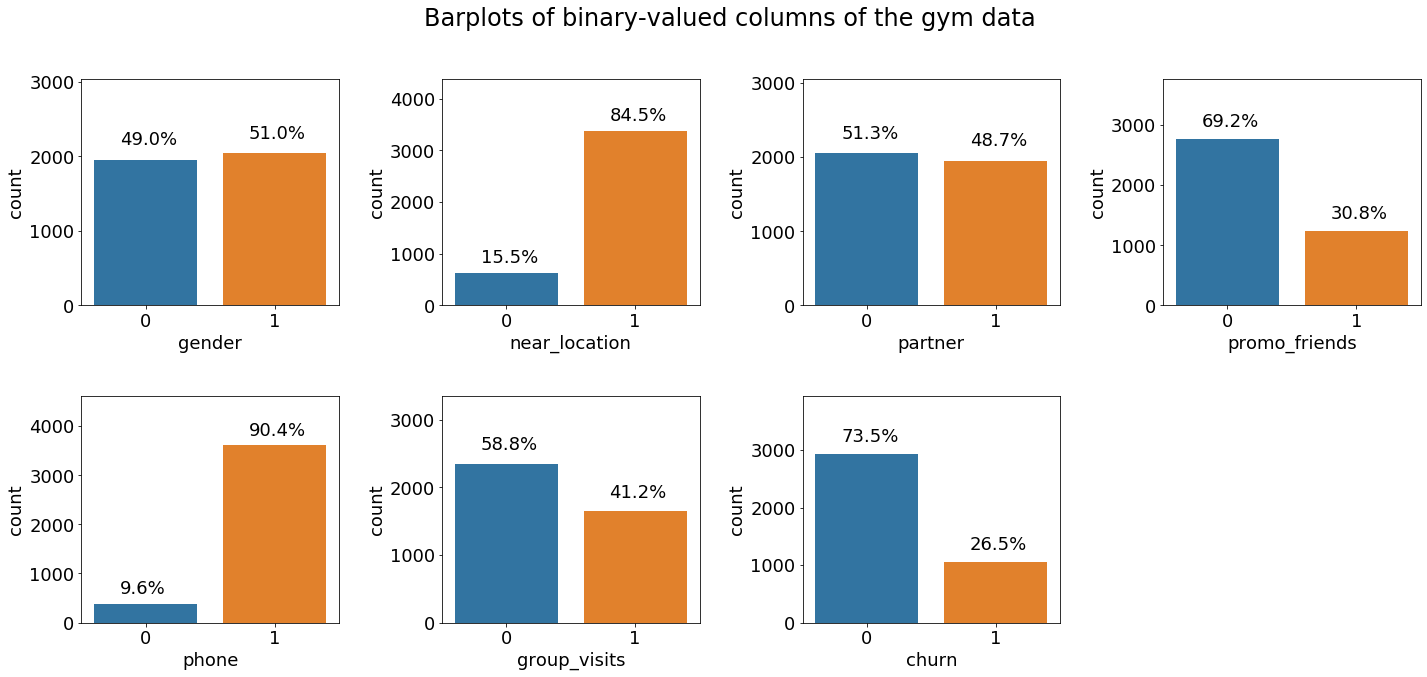

In [9]:
fig, ax = plt.subplots(2,4, figsize=(24, 10))
fig.delaxes(ax[1,3])
plt.subplots_adjust(wspace = 0.4)
plt.subplots_adjust(hspace = 0.4)


axs = ax.ravel()
j=0

for column in ['gender', 'near_location', 'partner', 
               'promo_friends', 'phone', 'group_visits','churn']:
    sns.countplot(x=column, data=gym, ax=axs[j])
 # create a list to collect the plt.patches data
    totals = []
# find the values and append to list
    for i in axs[j].patches:
        totals.append(i.get_height())
# set individual bar lables using above list
    total = sum(totals)
# set individual bar lables using above list
    for i in axs[j].patches:
    # get_x pulls left or right; get_height pushes up or down
        axs[j].text(i.get_x()+0.2, i.get_height()+200, \
            str(round((i.get_height()/total)*100, 1))+'%', fontsize=18, color='black')
    axs[j].xaxis.label.set_size(18)
    axs[j].yaxis.label.set_size(18)
    axs[j].tick_params(axis ='both',labelsize = 18)
    axs[j].set_ylim(0, gym[column].value_counts().max()+1000)

    j+=1

plt.suptitle('Barplots of binary-valued columns of the gym data', fontsize=24)
plt.show()    


The plotted value counts reveals the followings:
- The number of male customers and female customers are about the same;
- Close o 85% of the customers live near the gym;
- Slightly less than half of the customers (ca 49%) are employees of partner companies;
- Slightly less than one third of the customers (ca 31%) signed up through a 'bring a friend' promotion;
- About 90% of the customers provided a phone number;
- Close to 60% of the customers do not join group lessons;
- Slightly more than a quarter of the customers (26.5%) did churn.

Now, let's continue with the remaining integer-valued columns. 

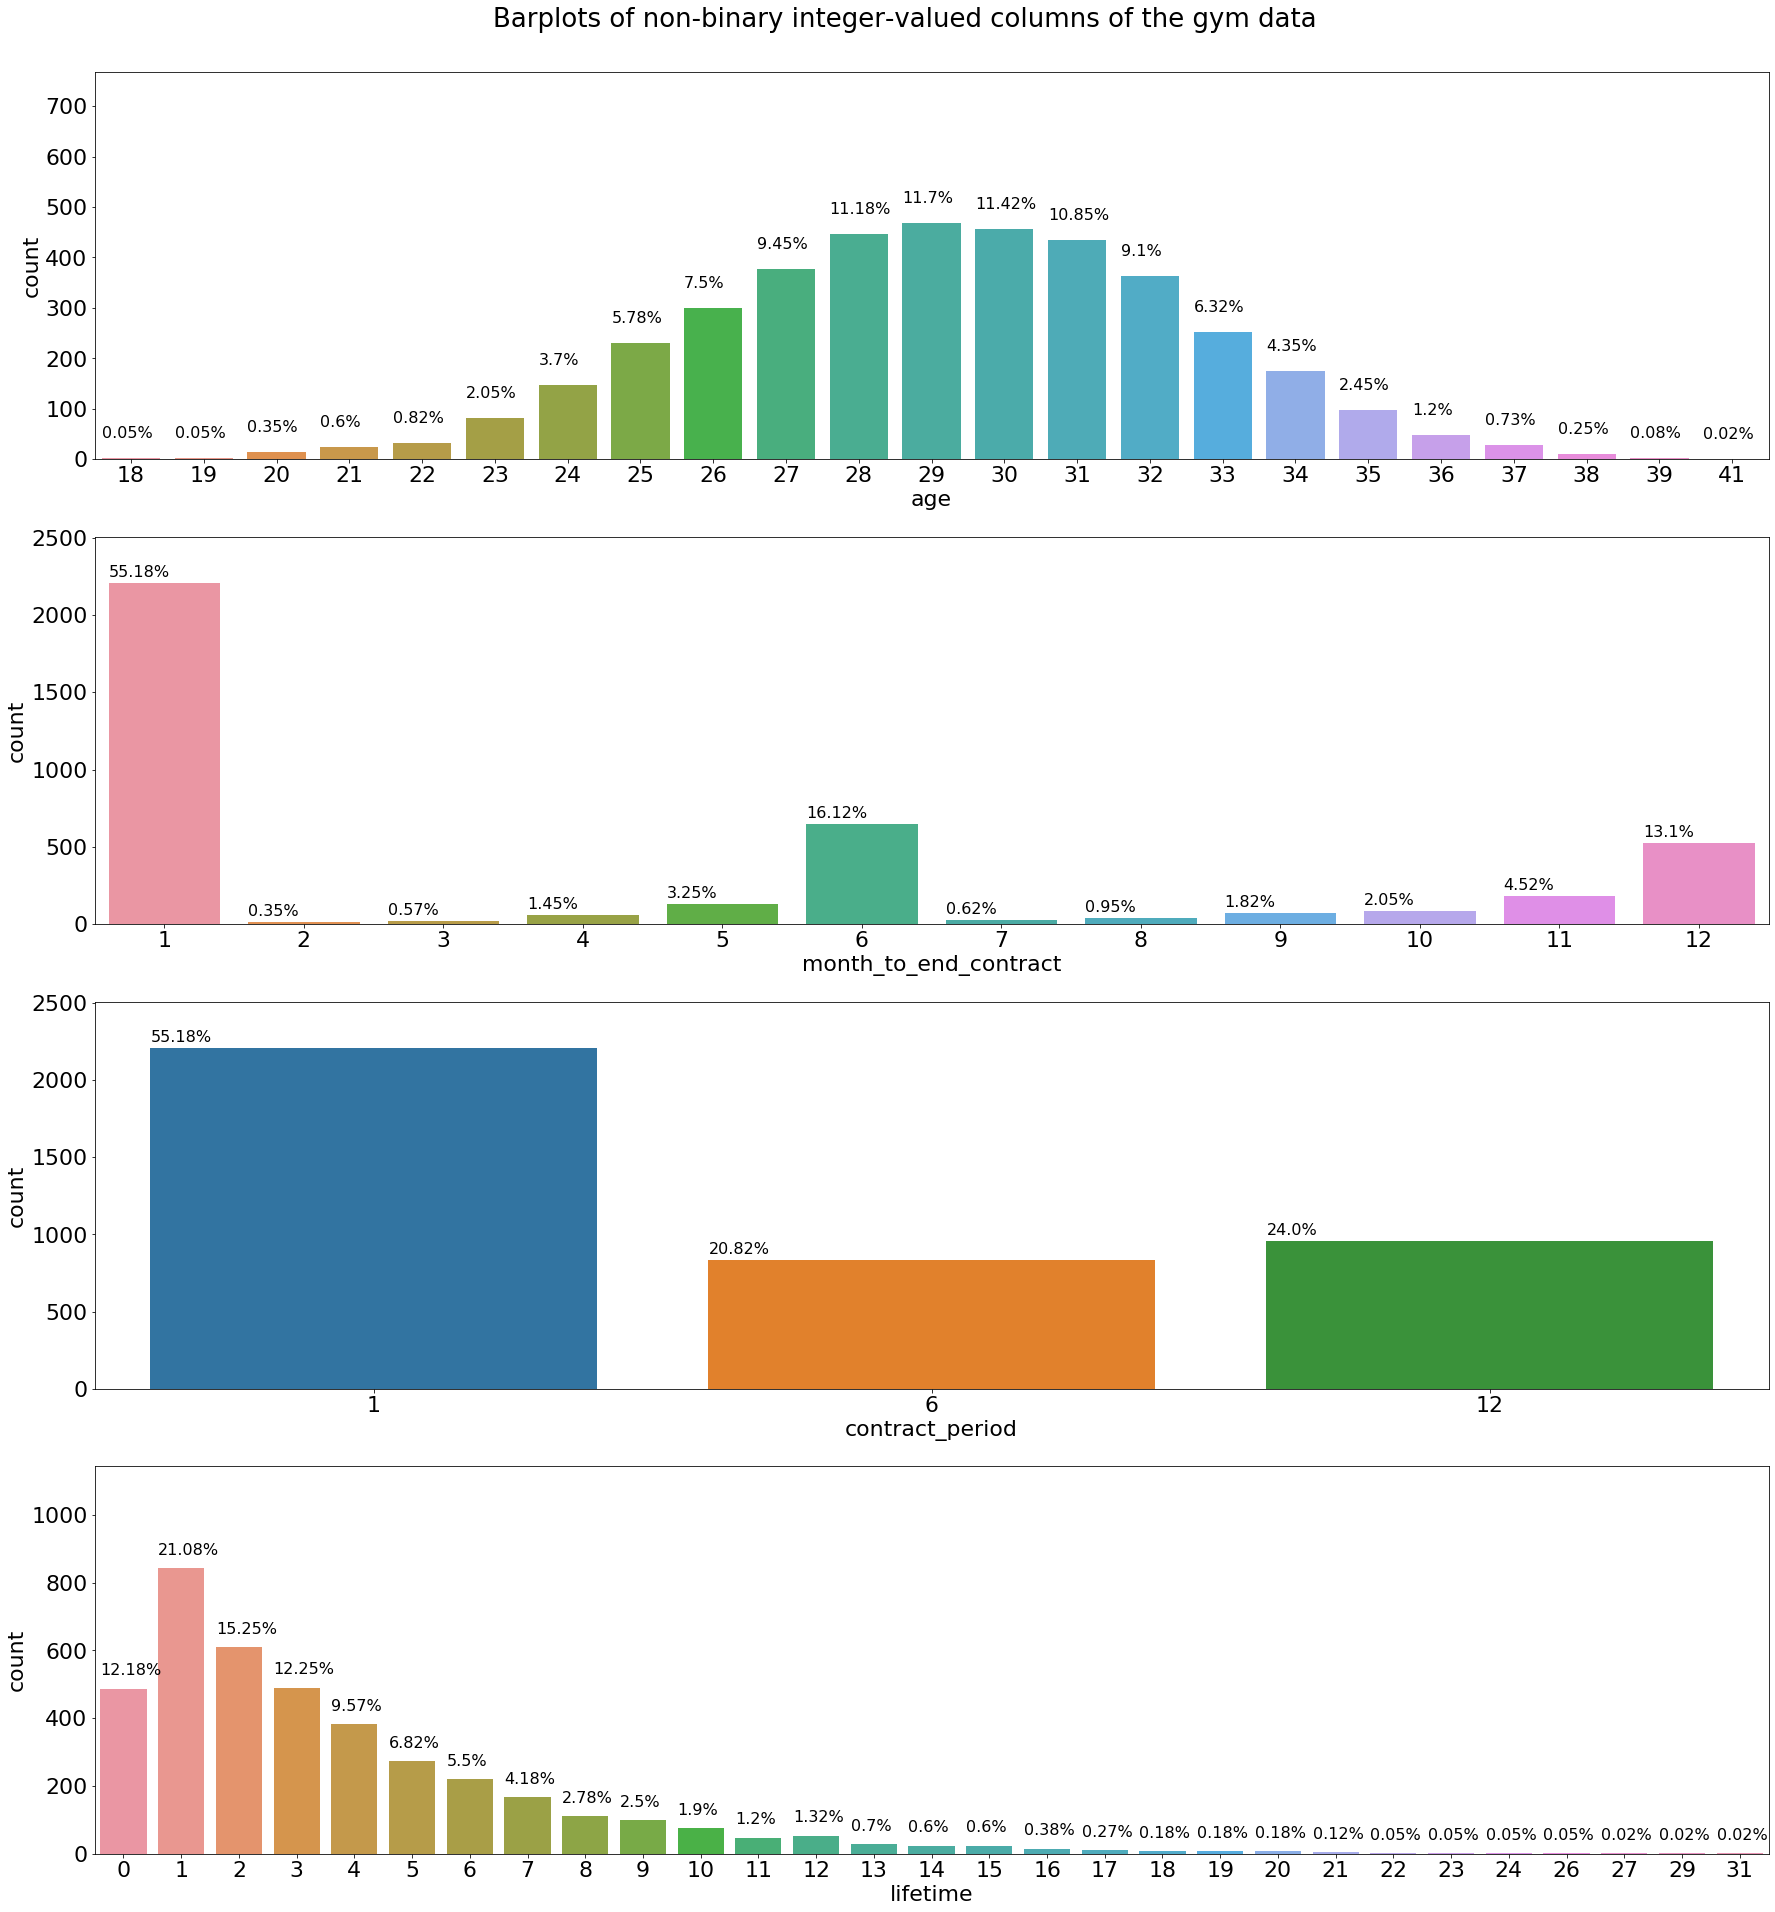

In [10]:
fig, ax = plt.subplots(4,1, figsize=(30, 30))
fig.subplots_adjust(top=0.95)

axs = ax.ravel()
j=0

for column in [ 'age', 'month_to_end_contract', 'contract_period', 'lifetime']:
    sns.countplot(x=column, data=gym, ax=axs[j])
 # create a list to collect the plt.patches data
    totals = []
# find the values and append to list
    for i in axs[j].patches:
        totals.append(i.get_height())
# set individual bar lables using above list
    total = sum(totals)
# set individual bar lables using above list
    for i in axs[j].patches:
    # get_x pulls left or right; get_height pushes up or down
        axs[j].text(i.get_x(), i.get_height()+40, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=16, color='black')
    axs[j].xaxis.label.set_size(22)
    axs[j].yaxis.label.set_size(22)
    axs[j].tick_params(axis ='both',labelsize = 22)
    axs[j].set_ylim(0, gym[column].value_counts().max()+300)
    j+=1
        
plt.suptitle('Barplots of non-binary integer-valued columns of the gym data', fontsize=26)
plt.show()    


This time we infer the followings from the value counts:
- The customers are aged between 18 to 41 years old. The age distribution looks like a normal distribution with most of the values concentrated in the band late twenties to early thirties. Thus, our gym attracts more this age group. 
- The contracts of slightly more than 55% of the customers will end in one month. The contracts will end in 6 months for ca 16% of the customers and in a year for ca 13% of the customers. So, more than half of the user profiles we have could churn out if they haven't already. 
- As for the lifetime, we can see that very few of the customers have a lifetime longer than a year. Approximately 12% signed up to the gym in the current month, i.e., their lifetime is indicated as 0 months, and 21% of the customers have a lifetime of 1. Then the lifetime of the customers relatively smoothly degrades in the following months. The distribution looks like a log-normal distribution.

Finally, let us plot histograms for the columns with float data type.

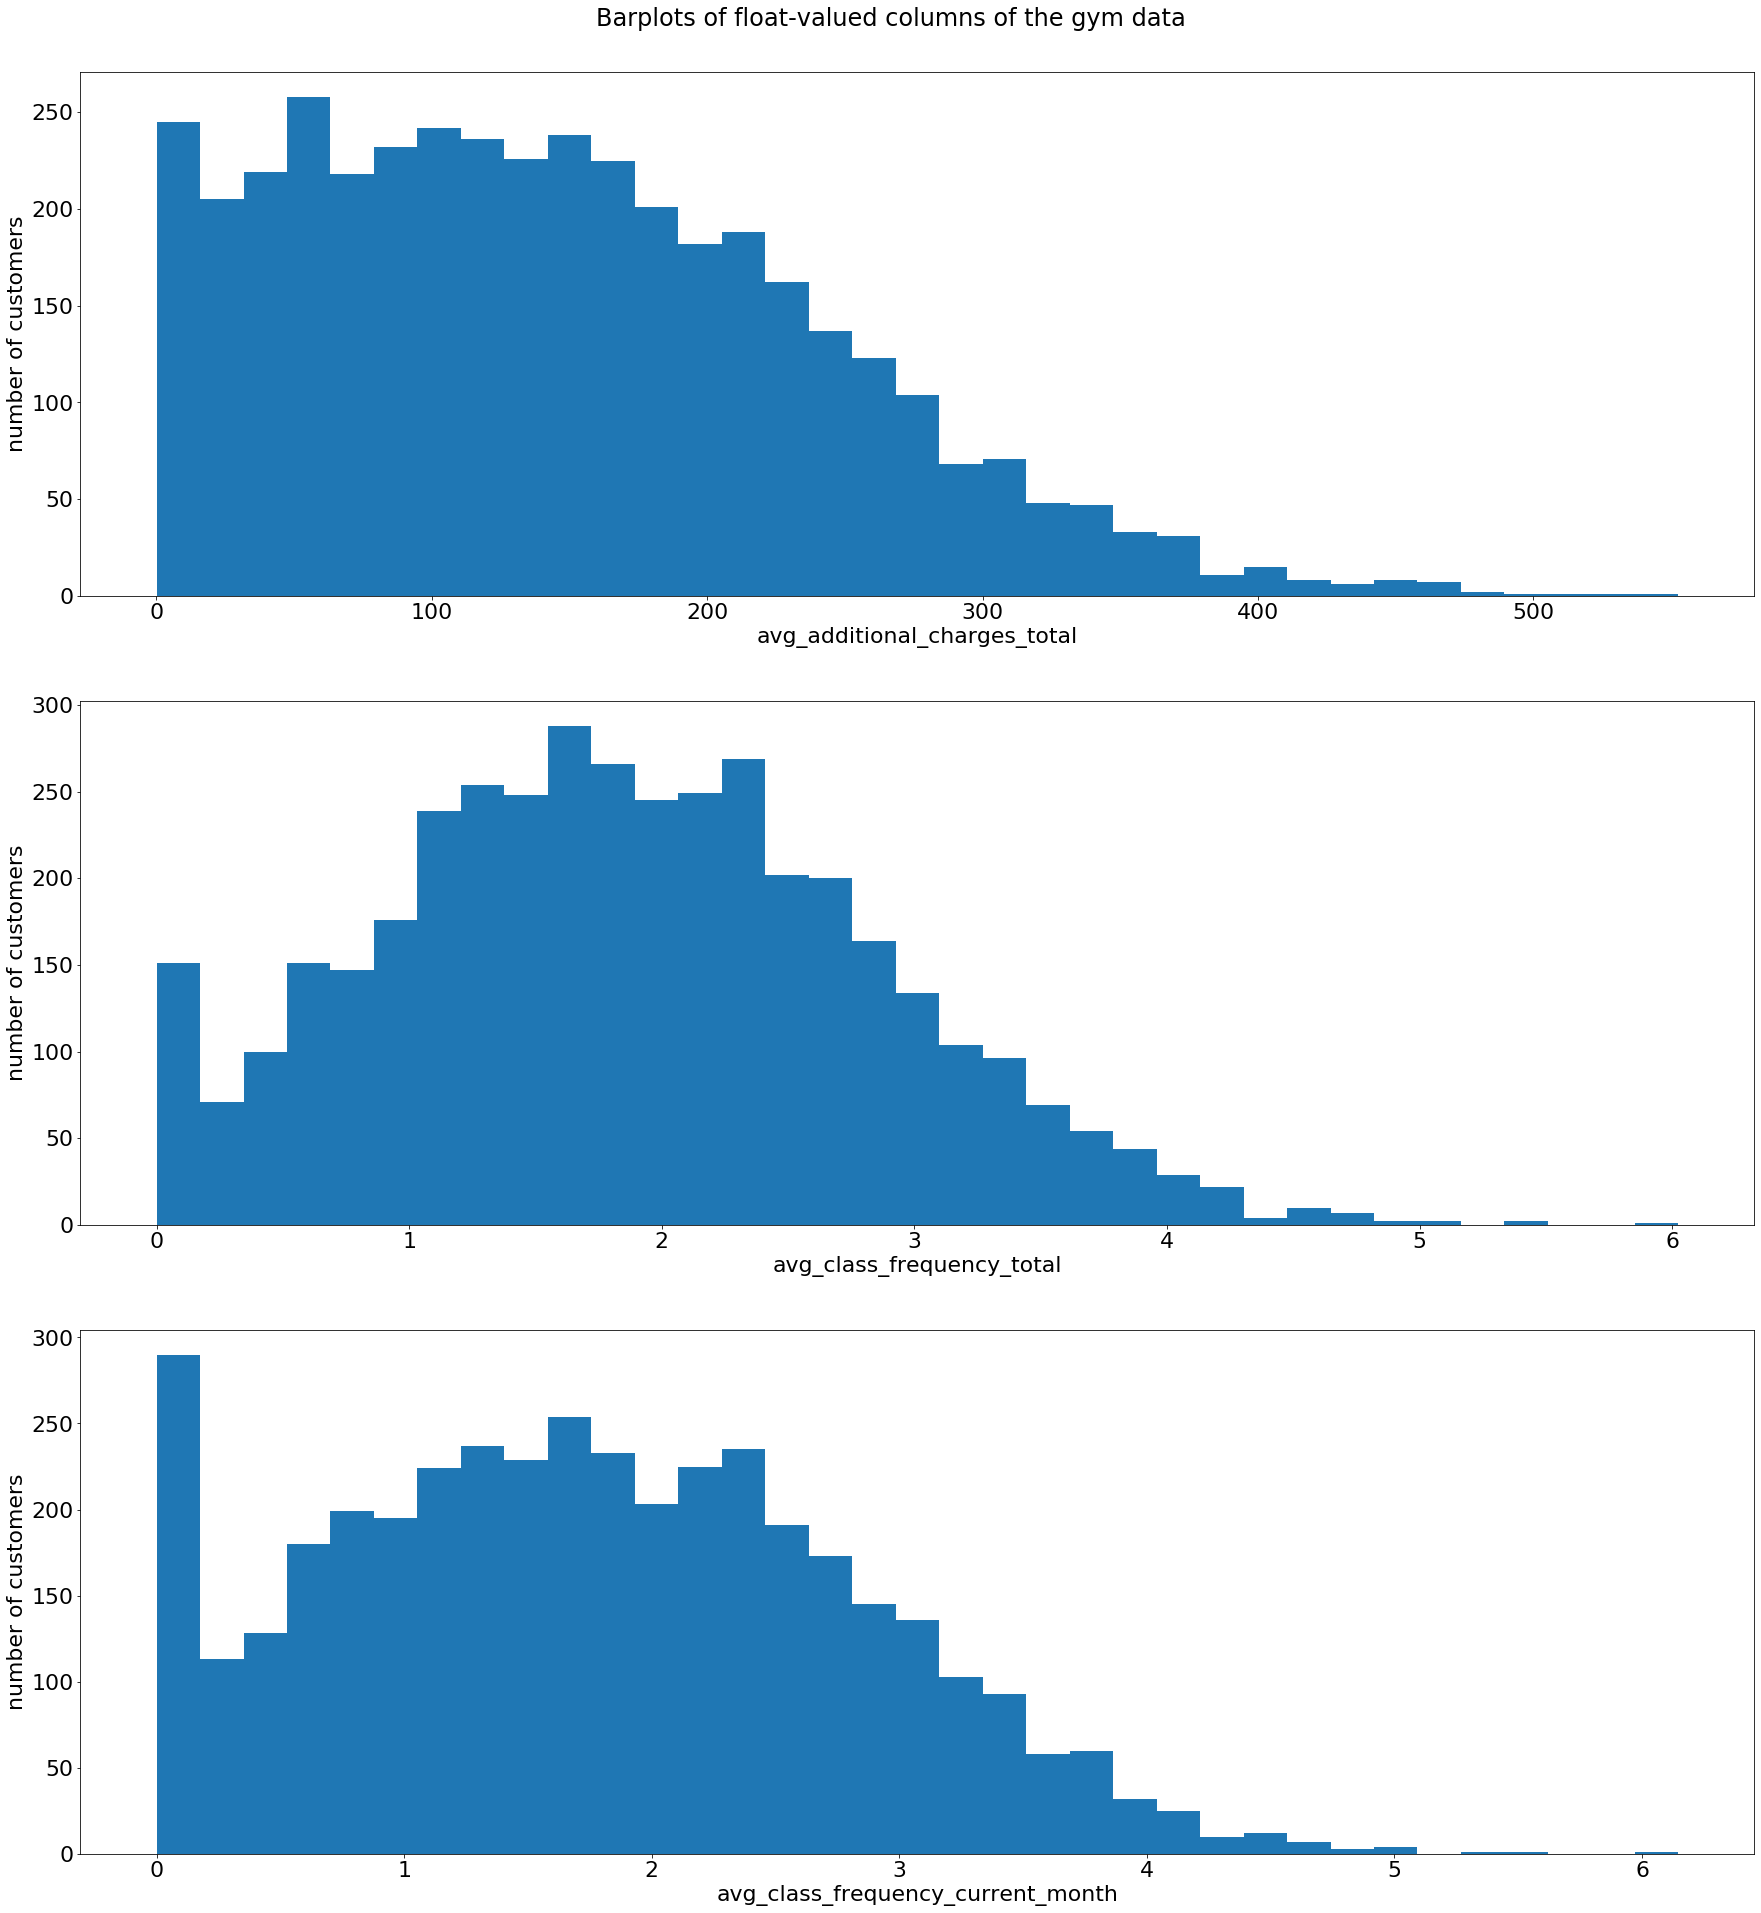

In [11]:
fig, ax = plt.subplots(3,1, figsize=(30, 30))
fig.subplots_adjust(top=0.95)

axs = ax.ravel()
j=0

y_labels = []
for column in ['avg_additional_charges_total', 
               'avg_class_frequency_total', 
               'avg_class_frequency_current_month']:
    axs[j].hist(x=gym[column], bins=35)
    axs[j].xaxis.label.set_size(22)
    axs[j].yaxis.label.set_size(22)
    axs[j].tick_params(axis ='both',labelsize = 22)
    axs[j].set_xlabel(column)
    axs[j].set_ylabel('number of customers')
    j+=1
        
plt.suptitle('Barplots of float-valued columns of the gym data', fontsize=24)
plt.show()    


For the columns reporting averaged values, we can infer the followings:
- The total amounts of money spend on other gynm services seems to be uniform up to 200 US dollars, while it smoothly decays after that threshold, but for few customers it can be as much as 500 US dollars or more.
- The average frequency of visits per week over the customer's lifetime peaks close to but slightly less than 2 visits per week and steadily decays after that. However, another peak is observed near 0, showing that around 150 customers never comes back after the first week, and also many customers' do come less than once a week on average over their lifetime. So, the gym has customers who sign up but almost never use the services.
- A similar trend is observed in the plot showing the average frequency of visits per week over the preceding month. In fact the two plots look similar, with the peak near 0 weeks being even higher (with a value close to 300 cusomters) in the second plot. We guess that customers with a low average frequency of visits per week over the customer's lifetime did show up few times when they signed up and did not show up at all the previous month.
- From the similarity of the shapes of the average weekly frequency of visits histograms over the lifetime of the customers and the last month we can infer that most of the customers engage in routine behavior, i.e., we do not expect a lot of outlier customers who for instance visits intensively few weeks and do not show up at all few weeks.  

Now we study the summary statistics of the features. Note that it doesn't make sense to compute the mean values or standard deviations for binary-valued columns. So, we will focus on the non-binary valued columns. 

In [12]:
column_list = ['age', 
               'month_to_end_contract', 
               'contract_period',
               'lifetime', 
               'avg_additional_charges_total', 
               'avg_class_frequency_total', 
               'avg_class_frequency_current_month']

for column in column_list:
    printmd("{}".format(gym[column].name), color='blue')
    display(gym[column].describe())
    

<span style='color:blue'>age</span>

count    4000.000000
mean       29.184250
std         3.258367
min        18.000000
25%        27.000000
50%        29.000000
75%        31.000000
max        41.000000
Name: age, dtype: float64

<span style='color:blue'>month_to_end_contract</span>

count    4000.000000
mean        4.322750
std         4.191297
min         1.000000
25%         1.000000
50%         1.000000
75%         6.000000
max        12.000000
Name: month_to_end_contract, dtype: float64

<span style='color:blue'>contract_period</span>

count    4000.000000
mean        4.681250
std         4.549706
min         1.000000
25%         1.000000
50%         1.000000
75%         6.000000
max        12.000000
Name: contract_period, dtype: float64

<span style='color:blue'>lifetime</span>

count    4000.000000
mean        3.724750
std         3.749267
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        31.000000
Name: lifetime, dtype: float64

<span style='color:blue'>avg_additional_charges_total</span>

count    4000.000000
mean      146.943728
std        96.355602
min         0.148205
25%        68.868830
50%       136.220159
75%       210.949625
max       552.590740
Name: avg_additional_charges_total, dtype: float64

<span style='color:blue'>avg_class_frequency_total</span>

count    4000.000000
mean        1.879020
std         0.972245
min         0.000000
25%         1.180875
50%         1.832768
75%         2.536078
max         6.023668
Name: avg_class_frequency_total, dtype: float64

<span style='color:blue'>avg_class_frequency_current_month</span>

count    4000.000000
mean        1.767052
std         1.052906
min         0.000000
25%         0.963003
50%         1.719574
75%         2.510336
max         6.146783
Name: avg_class_frequency_current_month, dtype: float64

Let us summarize our findings:
- The mean value of the customers' age is around 29 years old, and in fact, this is also the median value. The standard deviation is around 3.26 years. Note that in a Normal distribution, about 95% of the data points fall within 2 standard deviation from the mean value. Although we have a discrete valued distribution for customer's age, we had observed in the previous step that its shape resembled the Normal curve. Let us check to what percentage of the total customers between 23 to 35 years old correspond. 

In [13]:
print('Share of gym customers having between 23 to 35 years old is:',
      round(((gym['age']>=23) & (gym['age']<=35)).sum()/4000*100,2), '%')

Share of gym customers having between 23 to 35 years old is: 95.85 %


- The mean value of the months remaining until the contract expires is around 4.3 months, while the median value is 1. The median value is not surprising, since we had found out in the previous step that the contracts of about 55% of the customers expire next month. The standard deviation is ca 4.2 months. This deviation is mostly caused by customers having still about 6 months or a year left before their contract expires. Maybe the gym offers promotions every half a year for a period of one month or so, and many customers signed their contracts during this time. 

In [14]:
print('Share of gym customers having 1, 5, 6, 11, 12 months left before their contract expire is:',
      round((gym['month_to_end_contract'].isin([1, 5, 6, 11, 12])).sum()/4000*100,2), '%')

Share of gym customers having 1, 5, 6, 11, 12 months left before their contract expire is: 92.18 %


The mean value of customers' lifetime is ca 3.7 month. The median is not far away with a value of 3 months. The standard deviation is also about 3.7 months. In the previous step, we had observed that customer lifetime extends rarely beyond a year. It is possible that people sign up once for a gym and if they drop out soon, they do not sign up another time. But it is also possible that if they attend regularly a gym, they do not renew their contract because they are changing the gym they are attending. So, we expect there are two groups of customers who churn: uninterested and unloyal customers. Let us find out the percentage of customers whose lifetime is larger than a year (a bit larger than the 3 sigma value of ca 11 months), our beloved but rare loyal customers.

In [15]:
print('Share of gym customers whose lifetime is more than one year:',
      round((gym['lifetime'] > 12).sum()/4000*100,2), '%')

Share of gym customers whose lifetime is more than one year: 3.48 %


<a class="anchor" id="step2_2"></a>
#### Summary statistics and bar histograms of data features grouped by churn property

Here we repeat the analysis of the previous subsection for data grouped by the churn property. 

We first show plots where the displayed percentages are computed from the total data. 

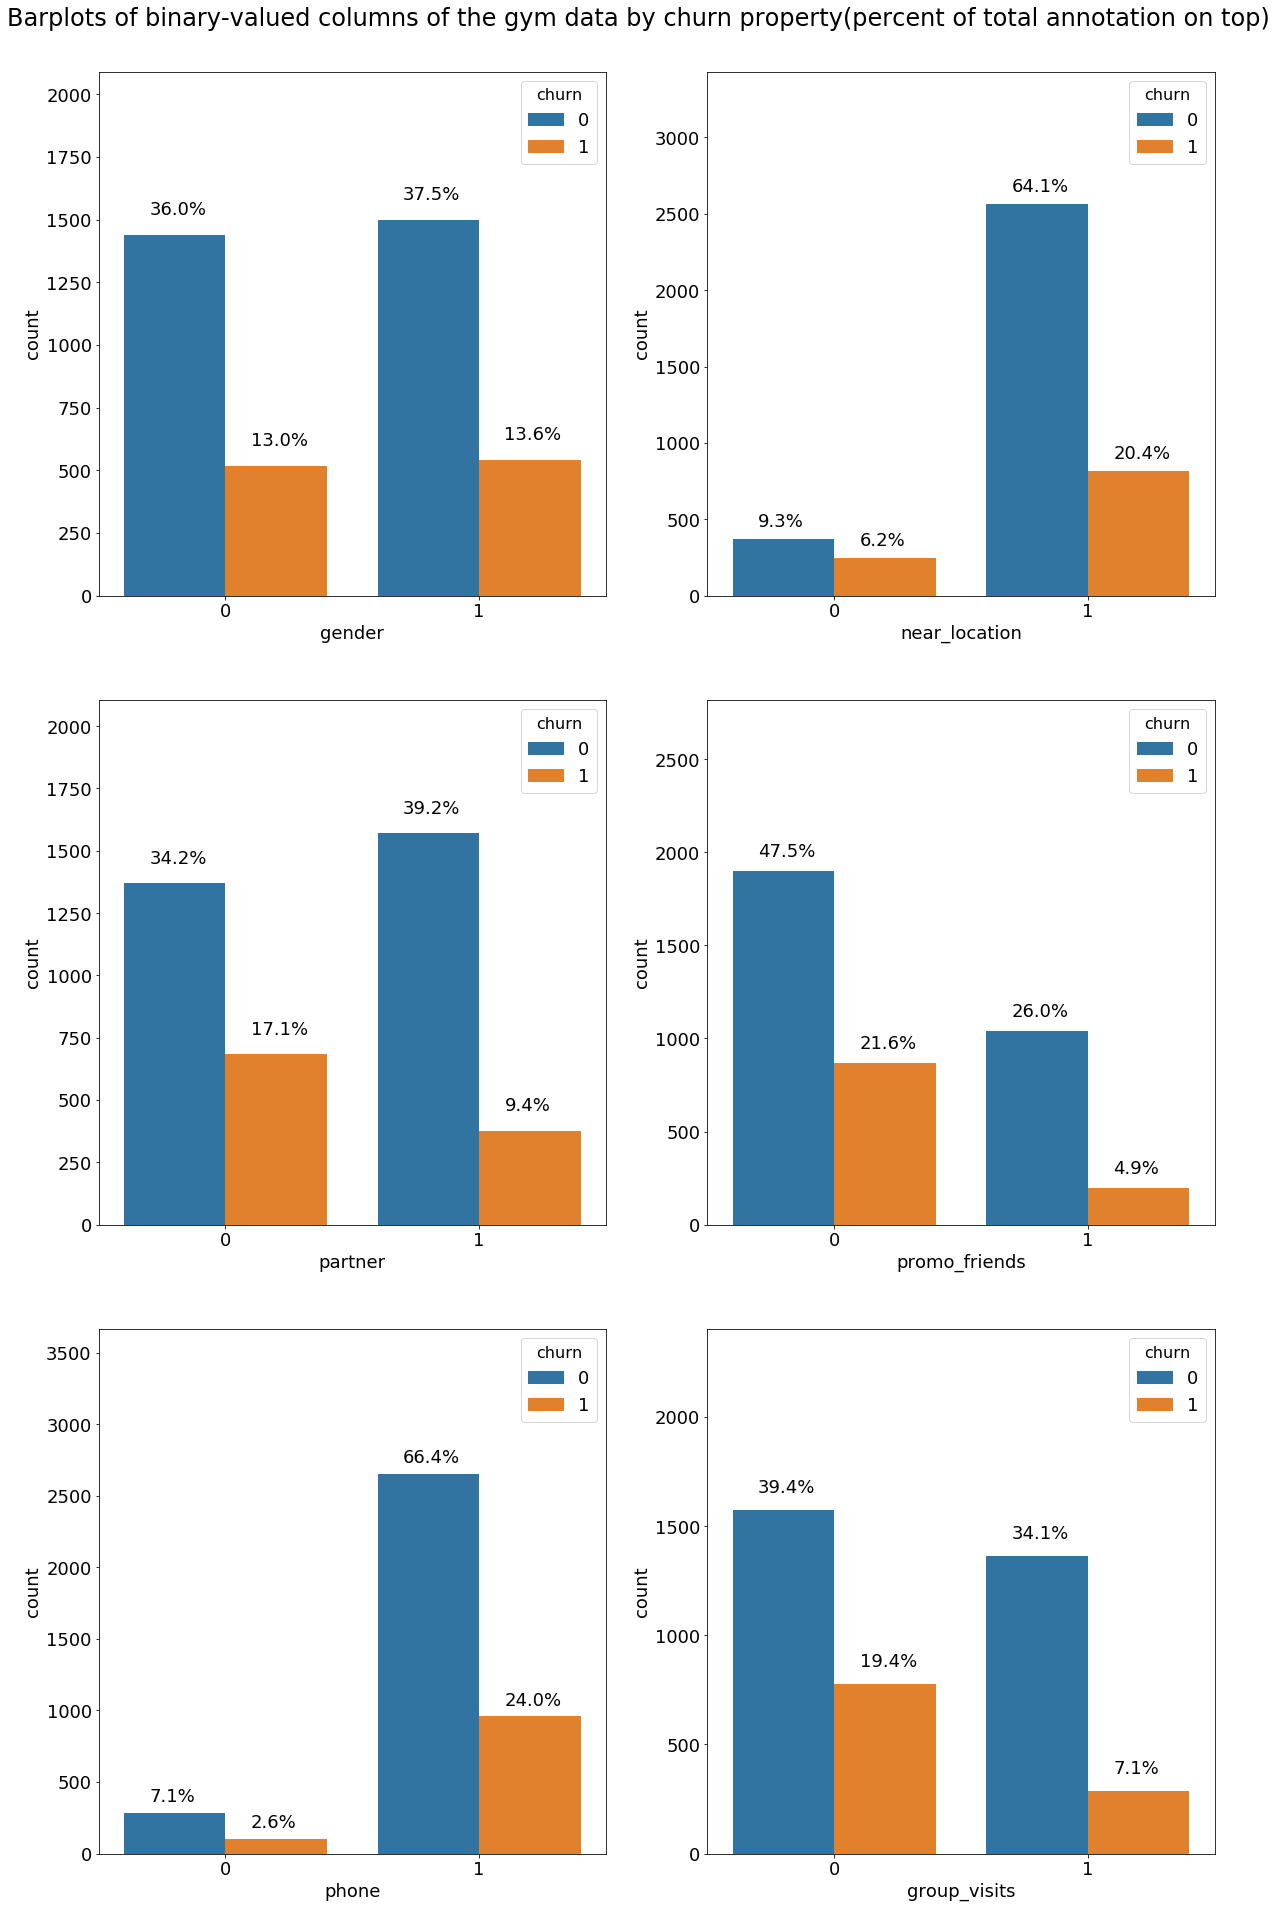

In [16]:
fig, ax = plt.subplots(3,2, figsize=(20, 30))
fig.subplots_adjust(top=0.95)

plt.subplots_adjust(wspace = 0.2)
plt.subplots_adjust(hspace = 0.2)


axs = ax.ravel()
j=0

for column in ['gender', 'near_location', 'partner', 
               'promo_friends', 'phone', 'group_visits']:
    sns.countplot(x=column, data=gym, hue='churn', ax=axs[j])
 # create a list to collect the plt.patches data
    totals = []
# find the values and append to list
    for i in axs[j].patches:
        totals.append(i.get_height())
# set individual bar lables using above list
    total = sum(totals)
# set individual bar lables using above list
    for i in axs[j].patches:
    # get_x pulls left or right; get_height pushes up or down
        axs[j].text(i.get_x()+0.1, i.get_height()+80, \
            str(round((i.get_height()/total)*100, 1))+'%', fontsize=18, color='black')
    axs[j].xaxis.label.set_size(18)
    axs[j].yaxis.label.set_size(18)
    axs[j].tick_params(axis ='both',labelsize = 18)
    axs[j].set_ylim(0, gym[column].value_counts().max()+50)
    axs[j].legend(title='churn', fontsize=18, title_fontsize=16)
    
    j+=1


plt.suptitle('Barplots of binary-valued columns of the gym data by churn property'
             '(percent of total annotation on top)'
             , fontsize=24)
plt.show()    



To help us interpret, we now also display the same plots such that the displayed percentages are computed based on the group sizes.

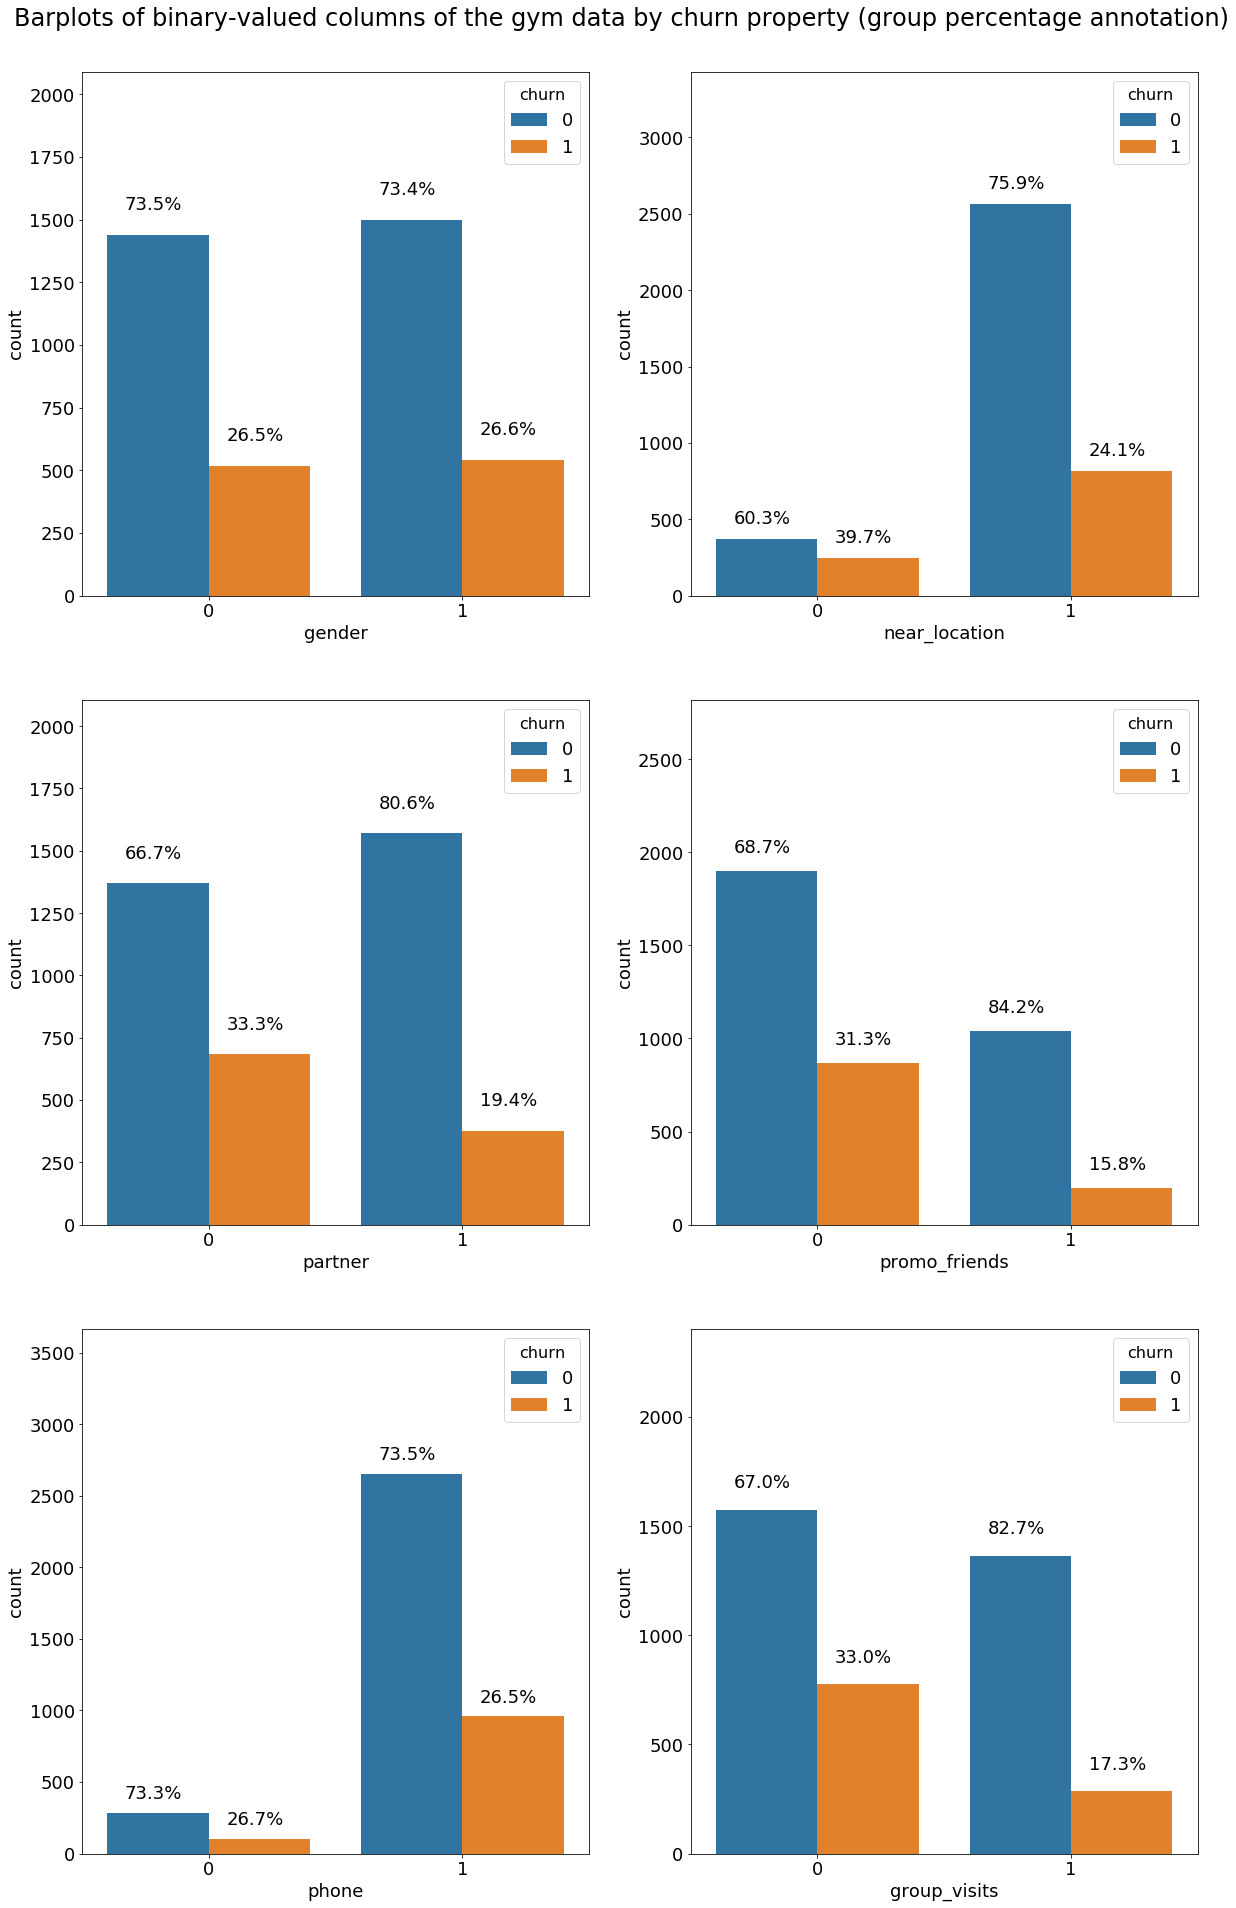

In [17]:
fig, ax = plt.subplots(3,2, figsize=(20, 30))
fig.subplots_adjust(top=0.95)

plt.subplots_adjust(wspace = 0.2)
plt.subplots_adjust(hspace = 0.2)


axs = ax.ravel()
j=0


for column in ['gender', 'near_location', 'partner', 
               'promo_friends', 'phone', 'group_visits']:
    sns.countplot(x=column, data=gym, hue='churn', ax=axs[j])

    Number_of_categories = 2
    hue_categories = 2
    plot = axs[j]
    a = gym.groupby(by=column)['churn'].value_counts().values
    patch = [p for p in plot.patches]

    for k in range(Number_of_categories):
        tot = gym[column].value_counts().sort_index().values[k]
        for l in range(hue_categories):
            percentage = '{:.1f}%'.format(100*a[k*Number_of_categories+l]/tot)
            x = patch[(l*Number_of_categories + k)].get_x() + patch[(l*Number_of_categories 
                                                                     + k)].get_width() / 2 - 0.13
            y = patch[(l*Number_of_categories + k)].get_y() + patch[(l*Number_of_categories + k)].get_height() +100
            axs[j].annotate(percentage, (x, y), size = 18)
    
    axs[j].xaxis.label.set_size(18)
    axs[j].yaxis.label.set_size(18)
    axs[j].tick_params(axis ='both',labelsize = 18)
    axs[j].set_ylim(0, gym[column].value_counts().max()+50)
    axs[j].legend(title='churn', fontsize=18, title_fontsize=16)
    
    j+=1


plt.suptitle('Barplots of binary-valued columns of the gym data by churn property '
             '(group percentage annotation)'
             , fontsize=24)
plt.show()    



Let us interpret the results of the above plots:
- We had observed previously that the number of male customers and female customers are about the same. Here we additionally observe that both genders have similar churn percentages of ca. 13% of total. As can be seen from the second series of plots, slightly more than one quarter of both genders churn. 
- As for the location feature, we can infer that a larger percentage of customers churn if they do not live nearby. For instance, close to 40% of customers who do not live nearby have churned, while only close to one quarter of those living nearby did. 
- The first series of plots tell us that while ca. 9% of the customers who churned a partner ones, 17% of the customers who churned are non-partner ones. Looking at the second series of plots, we see that for customers who did not sign up through a partner company, the percentage of churn is about 33% compared to the churn rate of ca 19% for those who signed up through a partner company. We guess that when their company pays for the gym, then the customers might just keep their contracts (even if they do not use much the service).
- The percentage of customers who signed up via friends promo and churned is about a quarter of the customers who did not signed up via this channel and churned. Among those who signed up through friends promo, close to one third churn. On the other hand, among those who did not sign up through friends promo, only close to one sixth did churn. 
- As in the case of the gender feature, the churn behavior is similar for the phone feature. Slightly more than a quarter of the customers in both groups churned.  
-  We see that the percentage of churned customers is more than double for those who do not attend group lessons. We observe that while only ca 17% of the customers who attended group lessons churned, about 33% of those who did not attend group lessons did churn. 

From the previous analysis, we can already tell that the gender and phone features don't have any significant impact on whether customers do churn or not. 

We move to the analysis of grouped data for the non-binary integer valued features. This time we plot horizontal barplots to help us read the percentage annotations more easily. Note that we only show percentages greater than 1% and use percent of total annotation.

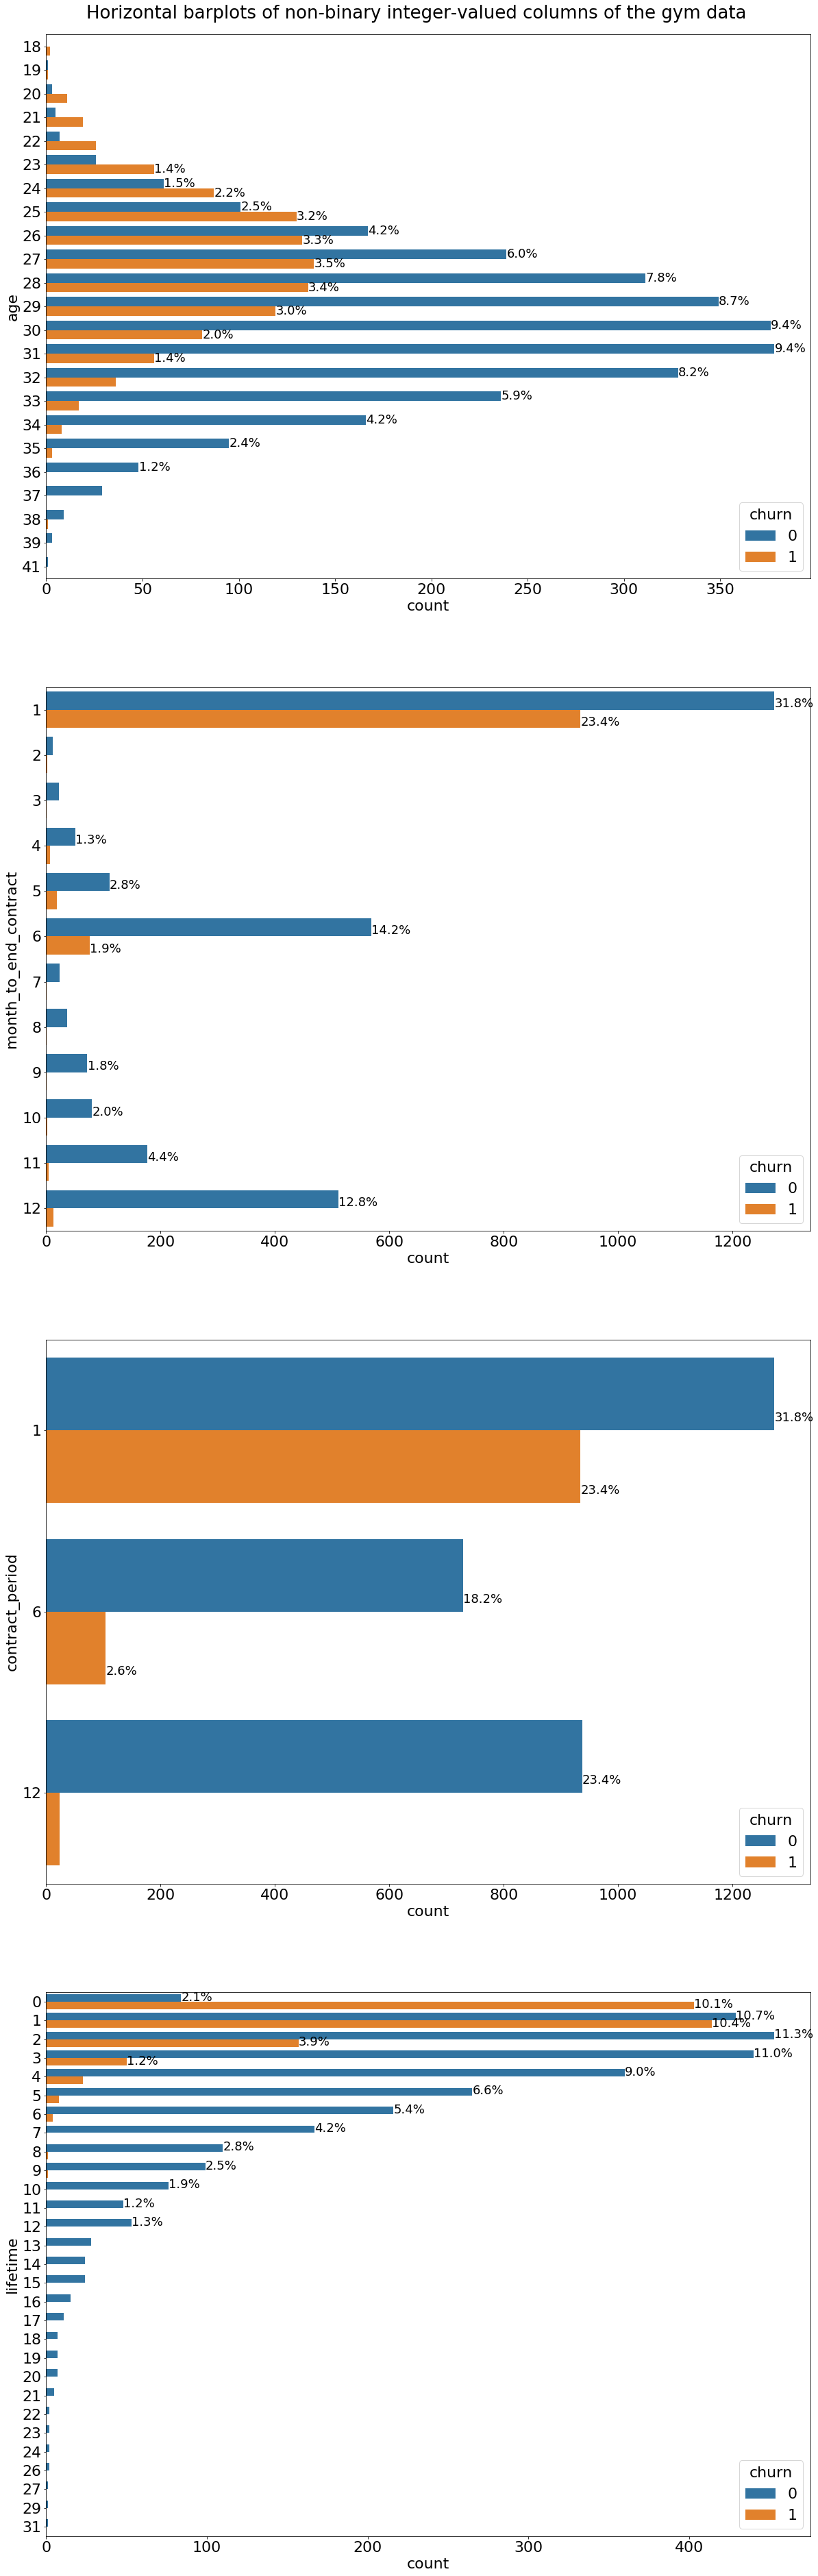

In [18]:
fig, ax = plt.subplots(4,1, figsize=(20, 60))
fig.subplots_adjust(top=0.97)

axs = ax.ravel()
j=0

for column in [ 'age', 'month_to_end_contract', 'contract_period', 'lifetime']:
    sns.countplot(y=column, data=gym, hue='churn', ax=axs[j])
 # create a list to collect the plt.patches data
    totals = []
# find the values and append to list
    for i in axs[j].patches:
        if math.isnan(i.get_width()) == False:
            totals.append(i.get_width())
# set individual bar lables using above list
    total = sum(totals)
# set individual bar lables using above list
    for i in axs[j].patches:
    # get_x pulls left or right; get_height pushes up or down
        if round((i.get_width()/total)*100, 1) > 1:
            axs[j].text(i.get_width()+0.1, i.get_y()+.35, \
                str(round((i.get_width()/total)*100, 1))+'%', fontsize=18, color='black')
    axs[j].xaxis.label.set_size(22)
    axs[j].yaxis.label.set_size(22)
    axs[j].tick_params(axis ='both',labelsize = 22)
    axs[j].legend(title='churn', fontsize=22, title_fontsize=22, loc='lower right')

    j+=1
        
plt.suptitle('Horizontal barplots of non-binary integer-valued columns of the gym data', fontsize=26)

plt.show()    


The grouped barplots reveals the following about the customers:
- We see that the age distribution of customers who churned and did not both look like normal distributions. Nevertheless, the percentages of customers who churn peak in the 26-28 years old band, while the percentages of customers who did not churn peak around 30-31 years old band. Moreover, for customers who are younger than 25 years old the percentage of customers who churned are greater than those who did not.
- We had found out that the contracts of slightly more than 55% of the customers were to end in one month. Now, we can see that a big portion of them, i.e., ca 23% of all the customers did churn and their contracts ends in one month. So the churn rate of the customers. In other words, among the customers whose contracts end in one-month, 42% churned. For all other months end to contract less than 2% of the customers churned. 
- The lifetime of the customers who churned are in general much shorter than those who do not. In fact the distribution of the lifetime of customers who churned is highly concentrated in the first 3 months and it almost disappears after 6 months. 

We had found out that the mean values of our customers age is 29. We will compute the grouped means later, but we learned here that the mean values to be about one or two years younger for those who churned and those who did not.  In addition, we had found out that our gym do not attract people above their forthies, but now we also learned that the gym struggles more in keeping customers younger than 30 years old as compared to those older than 30. We saw that the gym looses ca 42% of their customers whose membership is about to end (in their last month of their contract period), which is a high rate. We also saw that as we only have churn data for the next month, it is difficult to identify if a customer churned (will churn) or not more than one month in advance just by looking into the churn rate of customers based on their months left before the end of their contracts. After all, we expect most customers will renew or cancel their contracts within the last month of their membership period. However, when we looked at the lifetime distributions showing the number of months past since the customer came to the gym, we found here that the first few months of the membership are crucial in keeping the customers. 

We continue with the analysis of grouped data for the float valued features. 

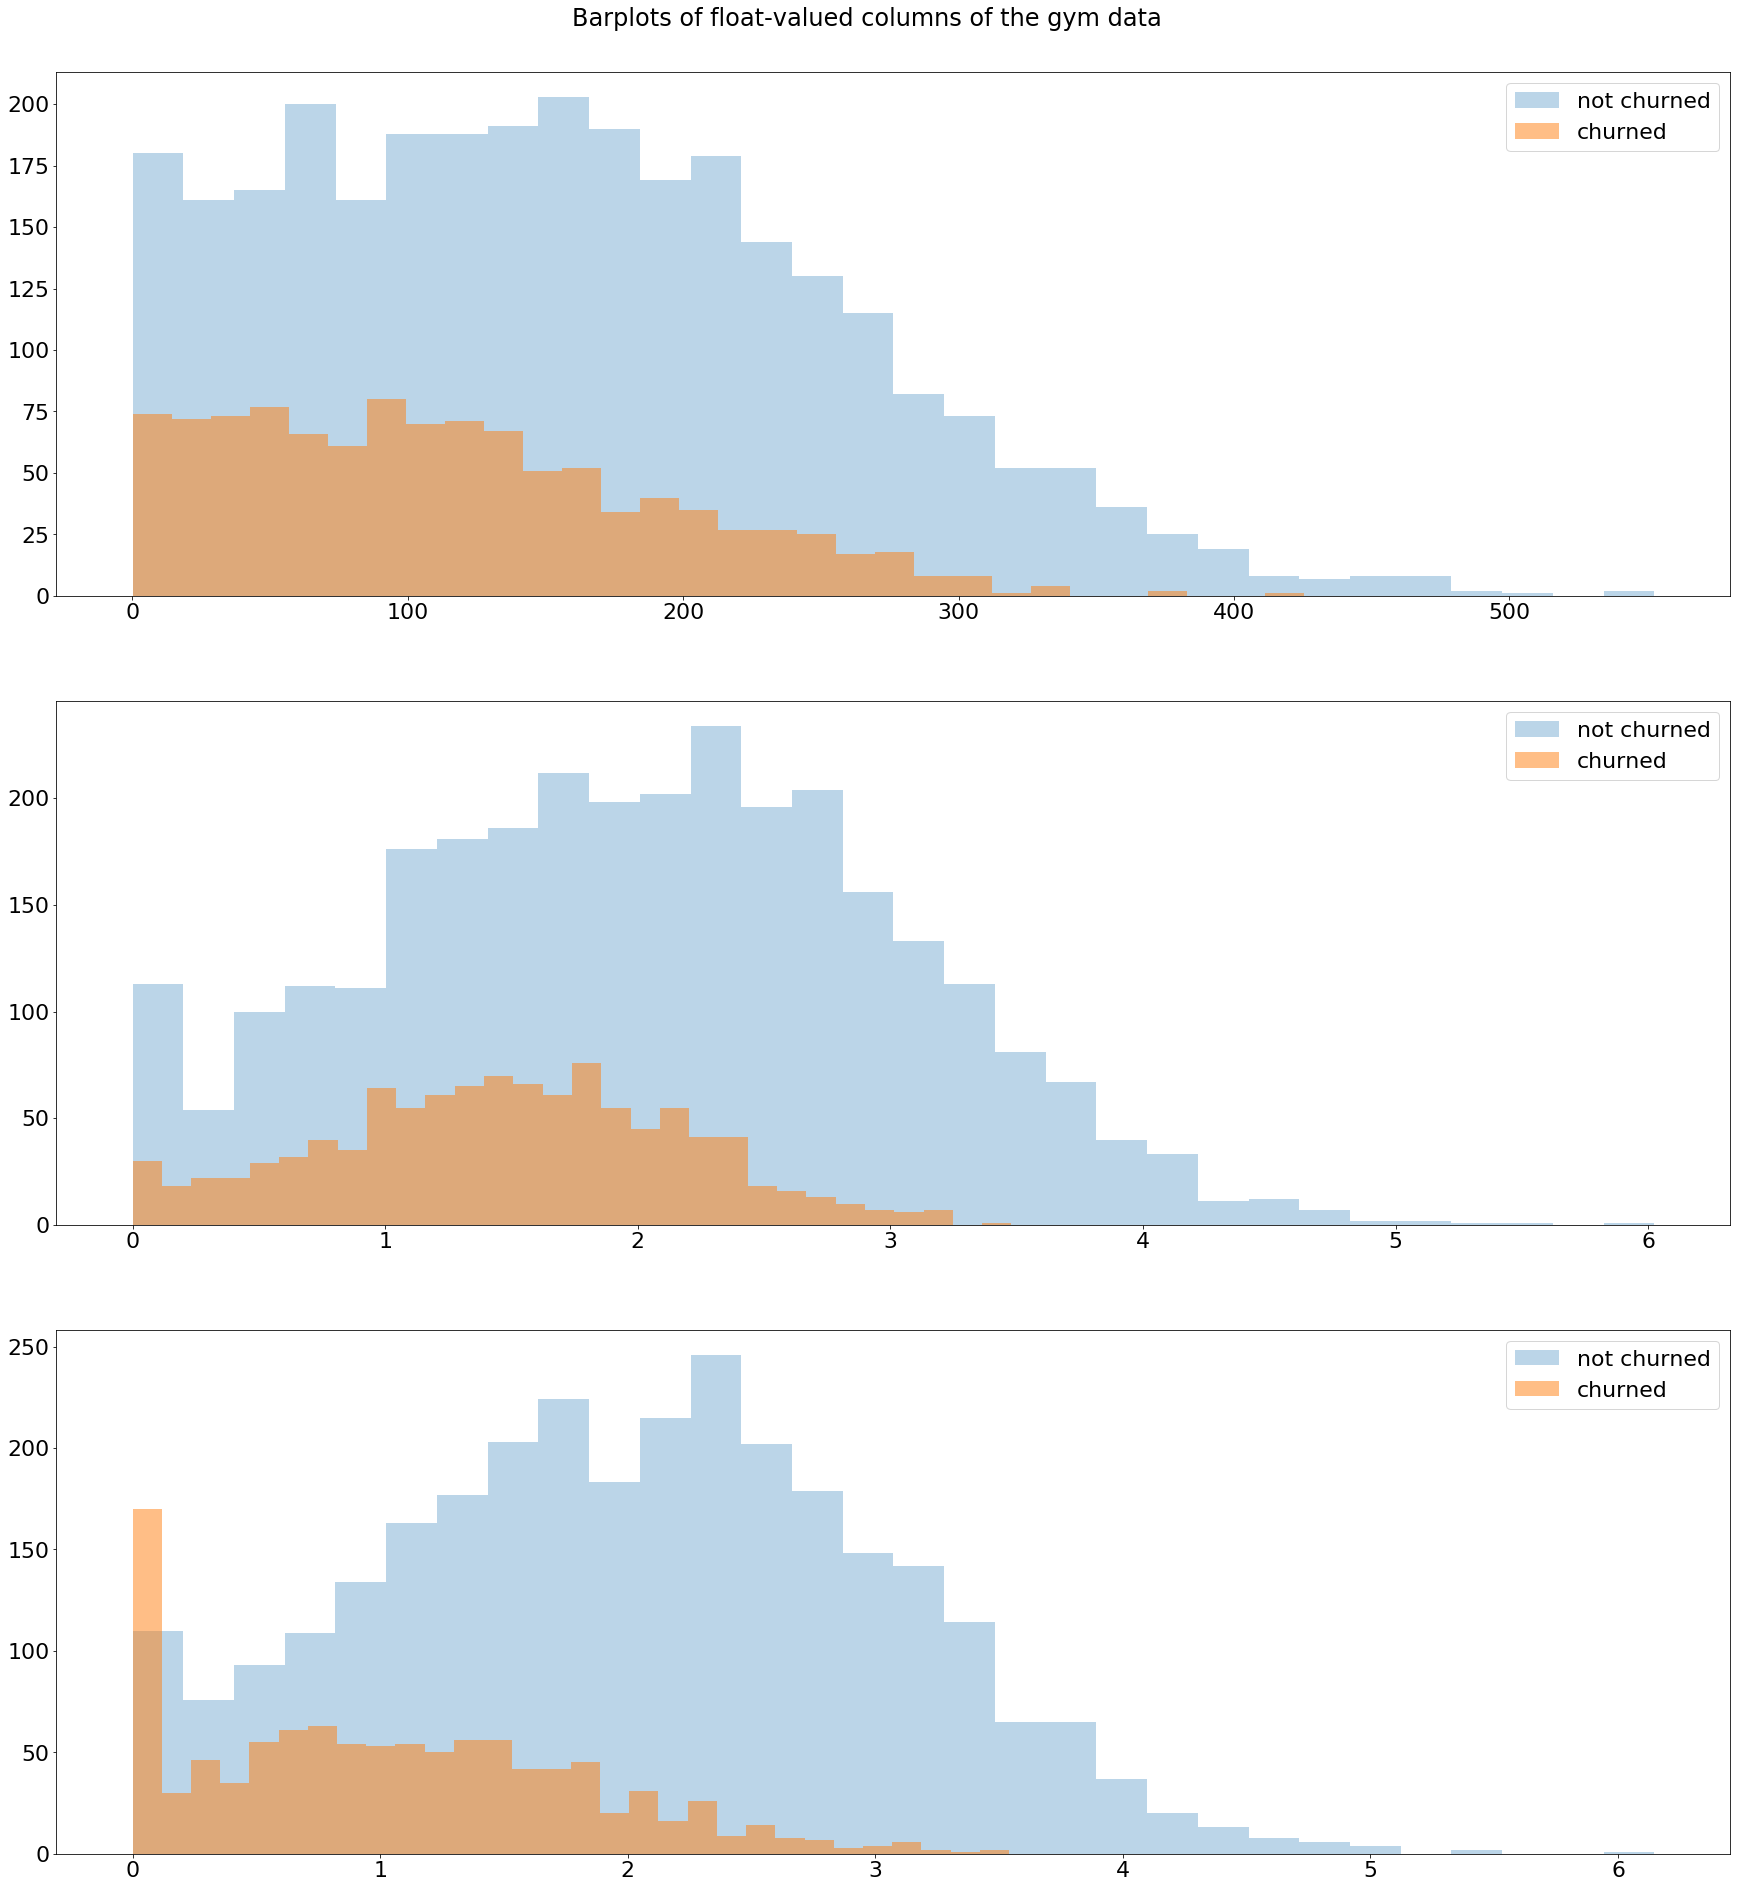

In [19]:
fig, ax = plt.subplots(3,1, figsize=(30, 30))
fig.subplots_adjust(top=0.95)

j=0

for column in ['avg_additional_charges_total', 
               'avg_class_frequency_total', 
               'avg_class_frequency_current_month']:
    ax[j].hist(x=gym.loc[gym['churn'] == 0, column], bins= 30, alpha=0.3)
    ax[j].hist(x=gym.loc[gym['churn'] == 1, column], bins= 30, alpha=0.5)

    ax[j].xaxis.label.set_size(22)
    ax[j].yaxis.label.set_size(22)
    ax[j].tick_params(axis ='both',labelsize = 22)
    ax[j].legend(labels=['not churned', 'churned'], fontsize=22,)
    axs[j].set_xlabel(column)
    axs[j].set_ylabel('number of customers')
    j+=1
        
plt.suptitle('Barplots of float-valued columns of the gym data', fontsize=24)
plt.show()    


Here are our findings from the above histograms:
- We can see that for all three features the grouped distributions looks rather similar in shape, though peaks and decaying behavior starts at smaller values of the x-axis. For instance, we can see that customers who spent more than 300 dollars per month on average for other services are extremely unlikely to churn, or similarly if their average class frequency (over their lifetime or over the last month) exceeds 3 classes. We also notice that there is a great chance of churn for customers who did not visit any classes over the last month.  

Finally, we compute the summary statistics of the grouped data for the integer and float-valued columns. 

In [20]:
column_list = ['age', 
               'month_to_end_contract', 
               'contract_period',
               'lifetime',
               'avg_additional_charges_total', 
               'avg_class_frequency_total', 
               'avg_class_frequency_current_month']

for column in column_list:
    printmd("{}".format(gym[column].name), color='blue')
    display(gym[column].describe().to_frame())
    display(gym.groupby(by='churn')[column].describe())

<span style='color:blue'>age</span>

,age
count,4000.000000
mean,29.184250
std,3.258367
min,18.000000
25%,27.000000
50%,29.000000
75%,31.000000
max,41.000000


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,2939.0,29.976523,3.009933,19.0,28.0,30.0,32.0,41.0
1,1061.0,26.989632,2.895163,18.0,25.0,27.0,29.0,38.0


<span style='color:blue'>month_to_end_contract</span>

,month_to_end_contract
count,4000.000000
mean,4.322750
std,4.191297
min,1.000000
25%,1.000000
50%,1.000000
75%,6.000000
max,12.000000


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,2939.0,5.283089,4.363522,1.0,1.0,6.0,10.0,12.0
1,1061.0,1.662582,1.964593,1.0,1.0,1.0,1.0,12.0


<span style='color:blue'>contract_period</span>

,contract_period
count,4000.000000
mean,4.681250
std,4.549706
min,1.000000
25%,1.000000
50%,1.000000
75%,6.000000
max,12.000000


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,2939.0,5.747193,4.716942,1.0,1.0,6.0,12.0,12.0
1,1061.0,1.728558,2.132371,1.0,1.0,1.0,1.0,12.0


<span style='color:blue'>lifetime</span>

,lifetime
count,4000.000000
mean,3.724750
std,3.749267
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,31.000000


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,2939.0,4.711807,3.874780,0.0,2.0,4.0,6.0,31.0
1,1061.0,0.990575,1.110799,0.0,0.0,1.0,1.0,9.0


<span style='color:blue'>avg_additional_charges_total</span>

,avg_additional_charges_total
count,4000.000000
mean,146.943728
std,96.355602
min,0.148205
25%,68.868830
50%,136.220159
75%,210.949625
max,552.590740


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,2939.0,158.445715,99.801599,0.171862,76.920993,149.881171,224.448274,552.59074
1,1061.0,115.082899,77.696419,0.148205,50.629127,103.814686,165.616858,425.53522


<span style='color:blue'>avg_class_frequency_total</span>

,avg_class_frequency_total
count,4000.000000
mean,1.879020
std,0.972245
min,0.000000
25%,1.180875
50%,1.832768
75%,2.536078
max,6.023668


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,2939.0,2.024876,1.016006,0.0,1.283137,2.043252,2.732944,6.023668
1,1061.0,1.474995,0.694705,0.0,1.010771,1.491187,1.956438,3.478646


<span style='color:blue'>avg_class_frequency_current_month</span>

,avg_class_frequency_current_month
count,4000.000000
mean,1.767052
std,1.052906
min,0.000000
25%,0.963003
50%,1.719574
75%,2.510336
max,6.146783


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,2939.0,2.027882,1.018994,0.0,1.297021,2.046697,2.740648,6.146783
1,1061.0,1.044546,0.770237,0.0,0.421337,0.979445,1.588576,3.540271


Let us comment on how the summary statistics are affected by the grouping of data according to the churn property:
- The mean value for the customers who churned is about 27 years old and about 30 years old for those who did not. Recall that the general mean is about 29 years old. 
- The mean of the month to end of contract which is ca. 3.7 months for the whole population is shifted to ca. 5.2 months for the customers who did not churn and to ca. 1.7 months for those who churned.
- Similary, the mean value of the contract period which is 4.7 months for the whole population shifted to ca. 5.7 months for the customers who did not churn and to ca. 1.7 months for those who churned.
- The mean value of the lifetime feature which is 3.7 for all the customers increased to ca 4.7 for those who did not churn and dropped to ca. 1 for those who churned.
- The mean value for the average additional charges spent for customers who did not churn is ca. 158 dollars (which is close to the general mean of ca. 147 dollar) and it is ca. 115 dollars for those who churned. 
- For the average weekly class frequency of the customers over their lifetime, the mean value is at about 2 classes for customers who did not churn and at about 1.5 classes for those who churned. The general mean is about 1.9 classes.
- As for the average class frequency of the customers over the last month, the mean value for customers who did not churn stands at ca. 2 classes per week and at ca 1 classses per week for those who churned. The general mean is about 1.8 classes per week.


<a class="anchor" id="step2_3"></a>
#### Linear dependency analysis via the correlation matrix

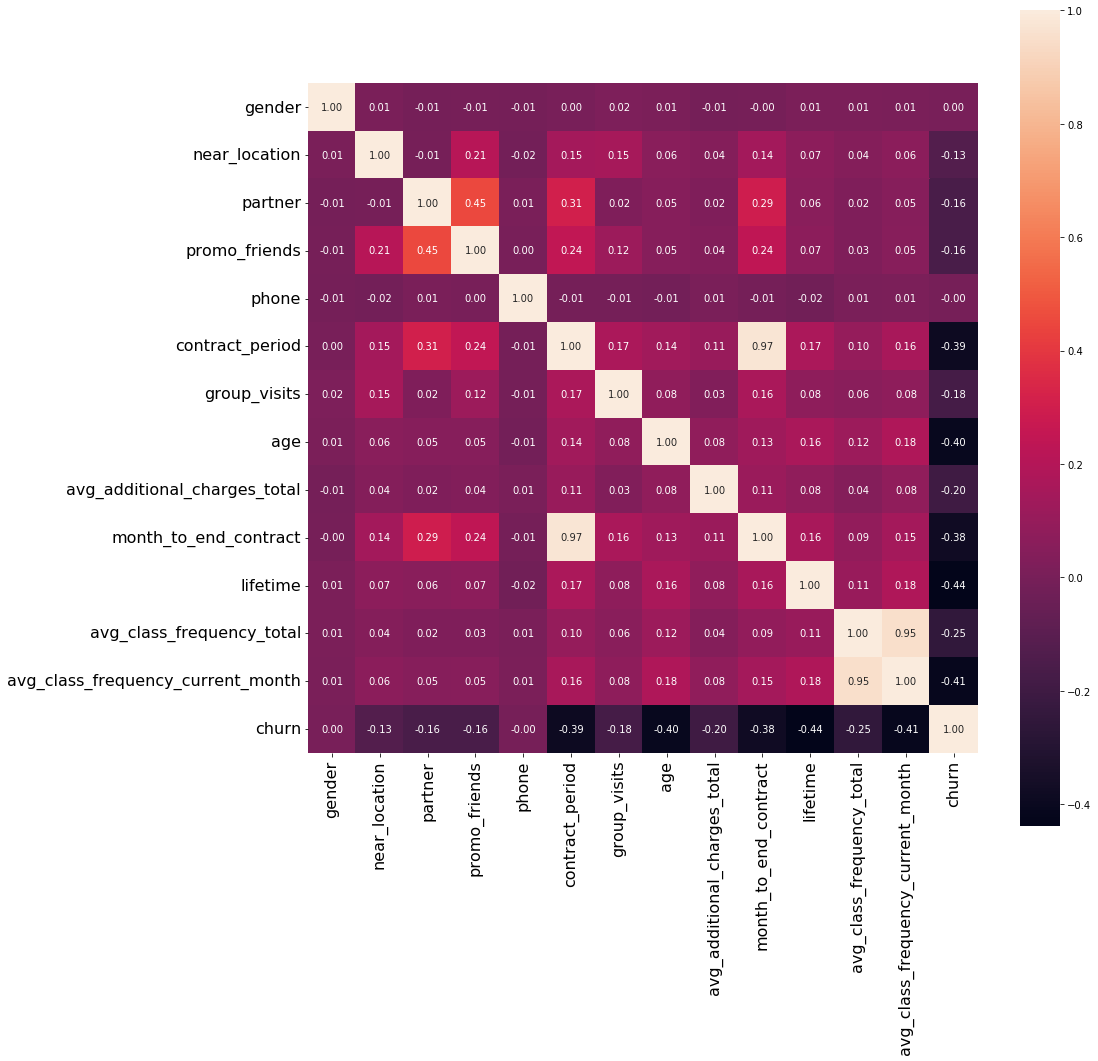

In [21]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(gym.corr(), annot=True, square=True, fmt='.2f')
ax.tick_params(axis ='both',labelsize = 16)
plt.show()


We see from the correlation matrix that the average class frequency over customer lifetime and over the last month is highly correlated. Similarly, highly correlated are the contract period and the month to end contract period. Perhaphs more surprising is that the correlation is also relatively higher between the partner promotion and friends promotion.

In [22]:
# sns.pairplot(gym, hue='churn')

**Concluding remarks:** In this step, we carried out extensive analysis of the customer features for both ungrouped and grouped data. We computed summary statistics and plotted bar charts or histograms, we compared the results for the groups with the general ones and tried to interpret the impact the features on the churn rate of the customers. We also computed the correlation matrix to analyse linear dependencies between the features.

The performed EDA revealed that some of the features can be expected to have little to no impact on the churn behavior of the customers, such as the gender of the customer. On the other hand, the analysis also revealed that the customers who churned can be expected to have different profiles and behavior patterns than those who did not churn. In particular, we found out that.

In the next steps, we will go further to expand our data analysis with basic machine learning tools. We will predict the probablity of churn of the customers and cluster them according to their profiles and also behavior patterns.

<a class="anchor" id="step3"></a> 
### Step 3. Building a model to predict churn

In this step, we build a binary classification model for customers where the target feature is the user's leaving next month. After we divide the data into train and validation sets, we will train the model with logistic regression and random forest methods. These models identify relationships between our target 'Churn' variable and the other features by applying probabilistic computation to help us determine wether each customer should belong to the churn class or no-churn class. To evaluate the models performance, we will compute the accuracy, precision, and recall metrics for both models using the validation data and compare the results of the models.

In [23]:
# divide the data into features and a target variable
gym_features = gym.drop(['churn'], axis=1)  
gym_target = gym['churn']  

# divide the data into train and test sets
gym_features_train, gym_features_test, gym_target_train, gym_target_test = train_test_split(
    gym_features, gym_target, test_size=0.2, random_state=0) 

# create a StandardScaler object and apply it to the train set
scaler = StandardScaler() 
# train the scaler and transform the matrix for the train set
gym_features_train_st = scaler.fit_transform(gym_features_train)

# apply standardization to the feature matrix for the test set
gym_features_test_st = scaler.transform(gym_features_test)


# declare the list of models
models = [LogisticRegression(random_state=0), RandomForestClassifier(n_estimators=100, random_state=0)]


# the function that takes the model and data as input and outputs probabilities and metrics
def make_prediction(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions= model.predict(X_test) 
    probabilities = model.predict_proba(X_test)[:,1]
    print('Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f}, ROC:{:.2f}'.format(
        accuracy_score(y_test, predictions),
        precision_score(y_test, predictions),
        recall_score(y_test, predictions),
        roc_auc_score(y_test, probabilities)))

t=0  
title_list = ['logistic regression', 'random forest']
# write a loop that outputs metrics for each model
for m in models:
    print('Prediction metrics for ' + title_list[t] + ':')
    make_prediction(m, gym_features_train_st, gym_target_train, gym_features_test_st, gym_target_test)
    print()
    t+=1

    

Prediction metrics for logistic regression:
Accuracy:0.92 Precision:0.85 Recall:0.83, ROC:0.97

Prediction metrics for random forest:
Accuracy:0.92 Precision:0.84 Recall:0.81, ROC:0.97



We observe that both models have the same score for the accuracy metric. On the other hand, the precision metric for logistic regression is 1% better and the recall metric for logistic regression is 2% better. Nevertheless, we should note that the differences are not very big. Before we decide, let us also discuss which metric, precision or recall, is more relevant to our business case. 

For the gym customers, it is very important to identify the users that will indeed churn (true positives) and we should minimize the number of customers that are identified as staying, yet who will churn (false negatives). However, we believe that it would not cost too much, if a customer that wasn't going to churn is identified as the opposite (false positives). Note that the recall metric expresses here the ability to find all relevant churn instances in our dataset, while precision expresses the proportion of the customers our model says they are going to churn that actually will churn. We also know that there is a trade-off between these two metrics: increasing one in the same model would decrease the other. Therefore, the recall metric is more relevant to our business case and we should rather choose the model that maximizes this metric, i.e., in this case logistic regression. So, we suggest to use logistic regression technique in computing the probabilty of churn for the customers.  

**Concluding remarks:** In this step, we built a logistic regression model and a random forest classification model for customers classification into churn and no-churn classes. We evaluated the models performance by computing three metrics: accuracy, precision, and recall. Based on these metrics, random forest outperformed logistic regression for the target feature of the customers leaving next month. 

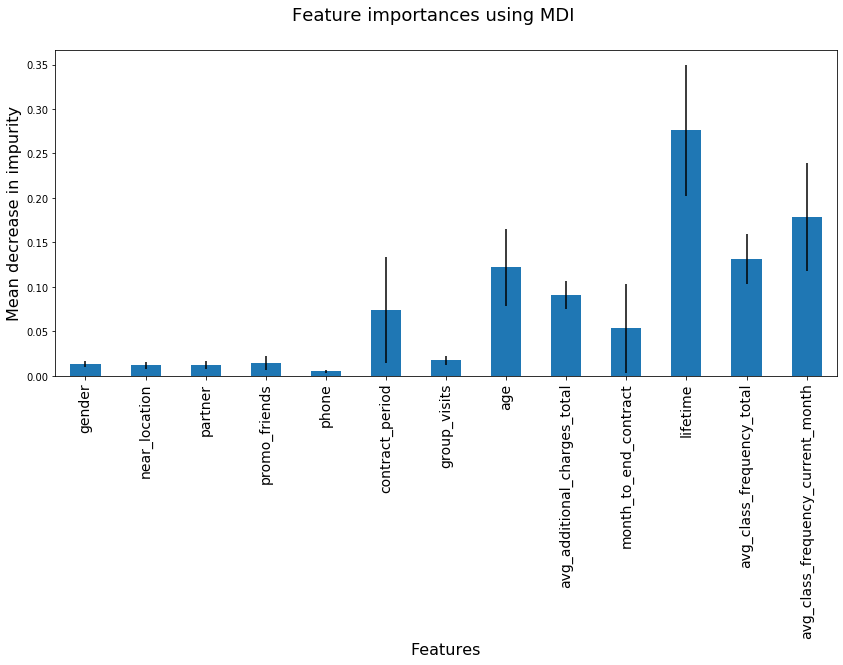

In [24]:
forest = RandomForestClassifier(random_state=0)
forest.fit(gym_features_train_st, gym_target_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=gym_features_train.columns)

fig, ax = plt.subplots(figsize=(14, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
fig.suptitle('Feature importances using MDI', fontsize=18)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Mean decrease in impurity', fontsize=16)
plt.xticks(fontsize=14)
plt.show()


We see that the following features were found important (from most significant to less): <code>lifetime</code>, <code>avg_class_frequency_current_month</code>, <code>avg_class_frequency_current_total</code>, <code>age</code>, <code>avg_additional_charges_total</code>, <code>contract_period</code>, <code>month_to_end_contract</code>.

### Step 4. Creating user clusters

Here we draw up typical customer portraits using clustering techniques and describe the main features of the most outstanding groups.

Before we use a clustering algorithm, we need to select the optimal number of clusters into which we would like to assign the customers. For that purpose, we build a dendrogram. 

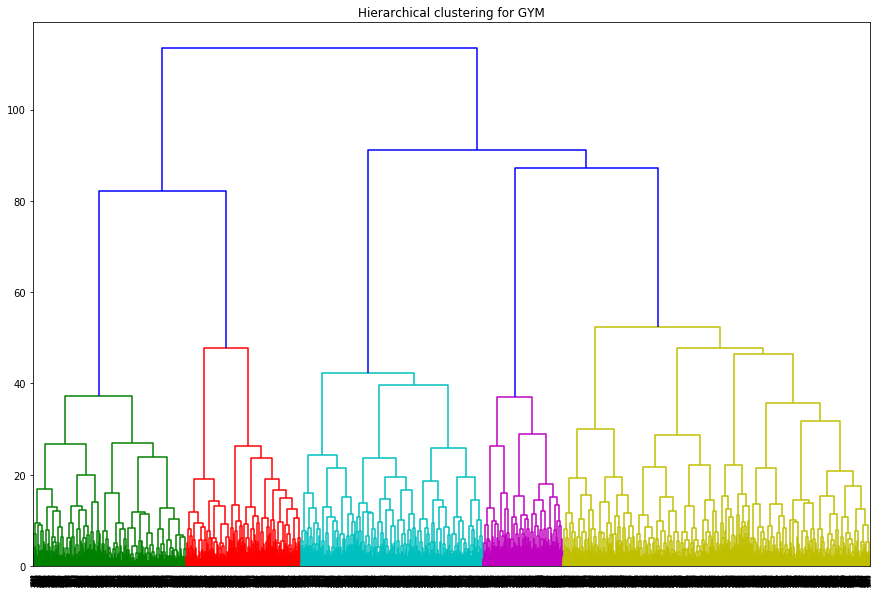

In [25]:
# create a StandardScaler object and apply it to the dataset
sc = StandardScaler()
gym_sc = sc.fit_transform(gym)

# Store the table with the linked bundles of objects
linked = linkage(gym_sc, method = 'ward') 

# Visualized the linked table as a dendrogram:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 


We have 5 colors in the dendogram. Thus, the suggested number of optimal clusters is 5.

Now that we have an estimate for the optimal number of clusters, we next run our clutering algorithm that assigns a group label to each customer. We then compute the groups' mean statistics.  

In [26]:
# define the k_means model with 3 clusters
km = KMeans(n_clusters= 5, random_state=0)
# predict the clusters for observations (the algorithm assigns them a number from 0 to 2)
labels = km.fit_predict(gym_sc)

# store cluster labels in the field of our dataset
gym['cluster_churn'] = labels

# get the statistics of the mean feature values per cluster
mean_clusters = gym.drop('churn', axis=1).groupby(by='cluster_churn').mean()
display(mean_clusters)


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
cluster_churn,,,,,,,,,,,,,
0,0.503676,0.000000,0.459559,0.075368,0.917279,2.069853,0.211397,28.522059,132.741216,1.950368,2.757353,1.706629,1.515890
1,0.492829,0.936115,0.764016,0.534550,0.919166,10.447197,0.516297,29.962190,161.853561,9.477184,4.833116,2.788103,2.786919
2,0.507917,1.000000,0.323995,0.213155,0.903776,1.546894,0.287454,26.926918,113.173051,1.500609,1.031669,1.449720,1.037592
3,0.521186,0.996610,0.282203,0.208475,0.904237,1.882203,0.452542,30.237288,157.988625,1.794915,4.923729,2.203432,2.207359
4,0.518895,0.968023,0.744186,0.526163,0.873547,8.859012,0.534884,29.728198,162.907495,8.155523,4.411337,0.957744,0.943967


**Comment: I did the project locally on my laptop and described the clusters according to the clusters shown there (I also had random_state=0). But after I uploaded to platform and deleted the outputs and restarted kernel, the clusters and their statistics changed.. However, I believe that my final conclusions and recommendations still make sense for the data in this project, so I am submitting it despite there could be some discrepancy between the clusters I describe and the ones in the above table.**

Looking at the above table we can make the following observartions (please make sure to read the above comment):
- In each cluster, around half of the customers are female and the other half male.
- Except for Cluster 0, all other clusters mainly consist of customers who lives close by to the gym. Cluster 0's cutomers on the other hand are those who don't live nearby. So, this first cluster already distinguishes itself from the others via the location feature. 
- Cluster 4 has the highest proportion of customers who joined through business partners or friends. Cluster 0 follows.
- In all clusters, almost all of the customers provided their phone numbers. In cluster 0, none provided their phone numbers.
- More than half of Cluster 4's customers attended group sessions. The percentage is lowest for Cluster 1 with only a quarter of the customers attending group sessions.
- The average age of customers in all clusters is approximately below 30 years old. Cluster 2 is the youngest group with an average of ca. 27 years old customers. 
- The highest average additional money is brought by clusters 2 and 4, while the lowest is brought by cluster 1.
- Cluster 2 is the cluster with the highest class frequency (both over customer lifetime and the last month) with close to 3 classes per week on average. Cluster 4 customers also managed to keep an average of ca. 2 classes per week, while for the remaining clusters the average is below 2 classes per week. 
- Clusters 2, 3, and 4 have the highest lifetime feature with ca. 4.6 months average. On the other hand, the average drops to ca 3.9 months for Cluster 0 and to ca. 1 months for Cluster 1.

We also checked few value counts within clusters to help us understand better customer features of each cluster. We do not show the outputs here, but we will integrate the findings into our final conclusions.

In [27]:
# print((gym.loc[gym['cluster_churn'] == 4, 'partner']+gym.loc[gym['cluster_churn'] == 4, 'promo_friends']).value_counts())
# print(gym.loc[gym['cluster_churn'] == 3, 'contract_period'].value_counts())
# gym.loc[gym['cluster_churn'] == 0, 'near_location'].value_counts()

In our final piece of code, we compute the churn rate of each cluster.

In [28]:
# Compute churn rate
display(gym.groupby(by='cluster_churn').mean()['churn'])

# churn_rates = gym.groupby(by='cluster_churn')['churn'].sum()/gym.groupby(by='cluster_churn').count().iloc[:,0]
# display(churn_rates)

cluster_churn
0    0.450368
1    0.007823
2    0.961023
3    0.003390
4    0.024709
Name: churn, dtype: float64

The cluster with the highest churn rate is Cluster 1 with almost all of the customers having turned out to churn. Cluster 2 follows albeit with a much smaller churn rate of ca. 45%. The remaining three cluster's churn rate is close to 0.  

**Concluding remarks:** In this step, we dicovered that the customers' profiles could be grouped into 5 clusters. We analyzed each group, and looked in particular at the mean group statistics, to describe their distinguishing features. We also discussed the churn rate of each group. We describe in more details the customer profiles of each cluster in our final conclusions step. 

### Step 5. Conclusions and Recommendations

In this last step, we draw our conclusions and formulate basic recommendations regarding the strategy for customer interaction and retention. In this project, we analyzed customer data of a gym to predict the churn probability and we identified customer profiles to help us come up with retention strategies. We started the project with some data preprocessing and continued with an in-depth EDA. These were followed up with model building for the purpose of binary classification: we were interested in building a 'good' model from our data to predict customer churn. For that purpose we run and evaluated the performance of Logistic Regression and Random Forest Classification algorithms and found out that the latter performed better. Finally, we run algorithms to cluster the customers optimally into classes and reported features' mean statistics for the found clusters. Here we summarize our findings by describing distinguishing features of the 5 customer profiles (clusters) we identified: 

From the observations we made, we see that each cluster displays some distinguishing features from others (please make sure you have read the comment in bold letters in the previous step.):
- Although Cluster 0's customers have an average of ca 5 months contract period and 5 months end to contract time, more than half of Cluster 0's customers have actually a 1 month long contract period. On average customer lifetime in this group is slightly less than 4 months. Interestingly, none of the customers in this group gave their phone numbers to the gym. About half of them joined through partners or friends promotion. About 40% participated group sessions, spent additionally ca. 145 dollars on average, and attended 1.8 classes per week on average over their lifetime. 
- Cluster 1 consist of the youngest customer cluster with the shortest contract and months to end contract period of both ca 1.5 months on average. A great majority of them actually have 1 month contracts. Given these short period, it is not surprising customer lifetime is also shortest in this cluster with a lifetime of 1 months on average. This is also the cluster that spends the least additional money, ca. 30 dollars less than Cluster 0's customers. The younger age average could be a factor in this. Although some of the customers joined through partner or friends promotions, 60% of the customers in this group did not join through any promotions. The majority do not attend group sessions and on average the cluster attended 1.4 classes over their short lifetimes.
- Cluster 2's customers attended on average 3 classes per week, so this is the cluster with the highest attendance rate. They also spend ca 15 dollars more on average for additional charges compared to Cluster 0. Their lifetime is also close to 5 months, but their contracts and months to contract end periods are shorter (around 2.5 months on average). This can be explained by the fact that this group consists almost entirely of customers with 1 month (majority) or 6 months contracts. As in the case of Cluster 0, about half of the customers in this group joined through both partner or friends promotions.
- Cluster 3, similar to Cluster 2, also consists mainly of customers with a short contract period and a lifetime close to 5 months on average. But this group has a lower group sessions attendance and classes atttendance average than Cluster 2. But the customers spend only ca 10 dollars less on average for additional charges. This is the oldest customer cluster with more than half of the customers who joined through partner or friends promo. 
- Cluster 4's customers have the highest contract and months to end contract periods, with an average of ca 11 and 10 months, respectively. The lifetime of customers on this group is however similar to the ones of Clusters 2 and 3. The distinguishing feature of this cluster is that the majority of the customers in this group joined through partner or friends promotions. Moreover, the majority also joined through both of these promotions. Though we do not know how exactly this works, it could be that work colleagues that are also friend tend to be more motivated to come to the gym and stay. This is the cluster that brings on average the highest amount per customer through the additional charges. More than half of the customers here attend group sessions and the cluster has an attendance of ca. 2 classes per week on average. 

**Recommendations:**

Here is a short list of recommendations we have to help the gym reduce customer churn and increase profit:
- It seems like older customers bring more money from additional charges than the younger ones. So, it could be possible to increase profit by introducing and advertised services that require additional charges to the older gym customers.
- On the other hand, we found out that the youngest customers tend to sign up for 1 month contracts, probably to try out the gym, yet churning at the end. We suggest to analyze in more details the customers in Cluster 1 and look for strategies to hook them up. The fact that the majority of the customers in this group did not join through partner or friends promotions and the fact that customers in this group showed less interest in group sessions or classes should be taken into account when discussing potential strategies.
- We also recommend to make sure that the phone number of customers are obtained at registration time. As we saw, about a quarter of the customers of Cluster 0 did churn. This is the cluster where none provided their phone numbers and where the majority had 1 month contracts. Naturally, if the gym cannot reach out to its customers, it would be impossible to reach them out for the purpose of advertisement when they no longer come to the gym or they decided to churn. 
- The possibility of churn is much higher for customers who do not live nearby. Retention strategies could also be looked to reduce churn for these customers, even if the percentage of customers living far away is quite small. 
- Finally, as data showed, customers who joined through partners and who are also friends turn out tend to be more spend more money through additional charges and the majority sign up 12 month contracts. Therefore, a very good strategy seems to be to increase the number of partner organisations. Organizing activities specific to given partner organizations, like team building events etc., could also help increasing retention by motivating colleagues to become friends or making more attractive to come to those that are already friends.